In [4]:
import drag_functions_turb as fn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from time_TvsR import *
from matplotlib.ticker import MultipleLocator
import scipy.optimize as opt
from matplotlib.colors import LogNorm

#import colormaps as cmaps
#plt.register_cmap(name='viridis', cmap=cmaps.viridis)
#plt.register_cmap(name='plasma', cmap=cmaps.plasma)
#plt.register_cmap(name='magma', cmap=cmaps.magma)
# plt.register_cmap(name='CMRmap', cmap=cmaps.CMRmap)


%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=3)
#colors = ['4D4D4D','5DA5DA', 'FAA43A', '60BD68', 'F17CB0','B2912F','B276B2','DECF3F','F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
#mpl.rcParams['axes.color_cycle'] = colors

In [5]:
a_au = 50.
m_core = 1e0
alpha = 1e-2
T = 200*a_au**(-3./7.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.

radii = np.logspace(-3,3,num=1000.)
len_arr = np.zeros((len(radii),4))
st_arr = np.zeros(len(radii))

for i,rad in enumerate(radii):
    len_arr[i,:] = TvsR_sng(a_au=a_au,m_earths=m_core,alph=alpha,r=rad,out='len')
    tmp, st_arr[i] = TvsR_sng(a_au=a_au,m_earths=m_core,alph=alpha,r=rad,out='st')
    
r_ws = len_arr[:,1]
r_h = len_arr[:,2]
v_h = r_h*om
v_drift = eta*v_kep*(1. + 4.*st_arr**2.)**(1./2.)/(1 + st_arr**2.)
v_turb = np.sqrt(alpha)*c_s*np.minimum(2*st_arr,(1+st_arr)**(-1.))
min_1 = np.minimum((12.*st_arr*v_h/v_turb)**(1./2.),(12.*st_arr*v_h/v_drift)**(1./2.))
r_chamb = np.minimum(min_1,(12.*st_arr)**(1./3.))*r_h

plt.figure(1,figsize=(8,6))
plt.loglog(radii,r_ws)
plt.loglog(radii,r_h)
plt.loglog(radii,r_chamb)

ValueError: cannot copy sequence with size 5 to array axis with dimension 4

In [54]:
a_au_arr = np.linspace(1,100,num=100)
m_core = 5e-5
alpha = 1e-3


radii = np.logspace(-3,3,num=1000.)
len_arr = np.zeros((len(radii),4))
st_arr = np.zeros(len(radii))
time_arr = np.zeros(len(radii))
st_max_arr = np.zeros(len(a_au_arr))
st_chamb = np.zeros(len(a_au_arr))

for i,a_au in enumerate(a_au_arr):
    for j,rad in enumerate(radii):
        time_arr[j], st_arr[j] = TvsR_sng(a_au=a_au,m_earths=m_core,alph=alpha,r=rad,out='st')
    st_max_arr[i] = st_arr[np.where(time_arr != 0)[0][-1]]
    r_h = a_au*fn.au*(m_core*fn.m_earth/3./fn.m_sun)**(1./3.)
    T = 200*a_au**(-3./7.)
    c_s = np.sqrt(fn.k*T/fn.mu)
    om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
    v_kep = a_au*fn.au*om
    eta = c_s**2./2./v_kep**2.
    min_1 = np.minimum(12.*(r_h*om/(np.sqrt(alpha)*c_s))**3.,(r_h*om/(eta*v_kep))**3.)
    st_chamb[i] = np.minimum(min_1,1.)
    
    if (i % 10) == 0:
        print i
    
# r_ws = len_arr[:,1]
# r_h = len_arr[:,2]
# v_h = r_h*om
# v_drift = eta*v_kep*(1. + 4.*st_arr**2.)**(1./2.)/(1 + st_arr**2.)
# v_turb = np.sqrt(alpha)*c_s*np.minimum(2*st_arr,(1+st_arr)**(-1.))
# min_1 = np.minimum((12.*st_arr*v_h/v_turb)**(1./2.),(12.*st_arr*v_h/v_drift)**(1./2.))
# r_chamb = np.minimum(min_1,(12.*st_arr)**(1./3.))*r_h

# plt.figure(1,figsize=(8,6))
# plt.loglog(radii,r_ws)
# plt.loglog(radii,r_h)
# plt.loglog(radii,r_chamb)

0
10
20
30
40
50
60
70
80
90


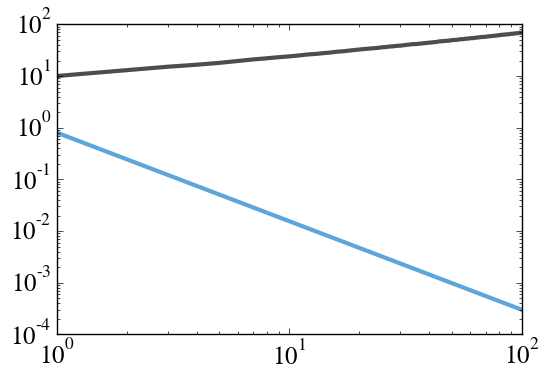

In [55]:
plt.loglog(a_au_arr,st_max_arr)
plt.loglog(a_au_arr,st_chamb)

In [61]:
masses = [m_core]

alphas=masses
work_arr = masses

v_p_arr = np.zeros((len(masses),len(a_au_arr)))
v_shear_arr = np.zeros((len(masses),len(a_au_arr)))
v_grav_arr = np.zeros((len(masses),len(a_au_arr)))
v_pg_arr = np.zeros((len(masses),len(a_au_arr)))
r_acc_arr = np.zeros((len(masses),len(a_au_arr)))

# work_arr = v_p_arr

# alpha = 1e-100

for k,M in enumerate(masses):
    for i,semi_maj in enumerate(a_au_arr):
        r = st_solver(st=st_max_arr[i],alph=alpha,a_au=semi_maj,m_earths=m_core)
        v_p_arr[k,i],v_shear_arr[k,i],v_grav_arr[k,i],v_pg_arr[k,i],r_acc_arr[k,i] = TvsR_sng(m_earths=M,r=r,out='en_param',\
                                                                               alph=alpha,a_au=semi_maj)

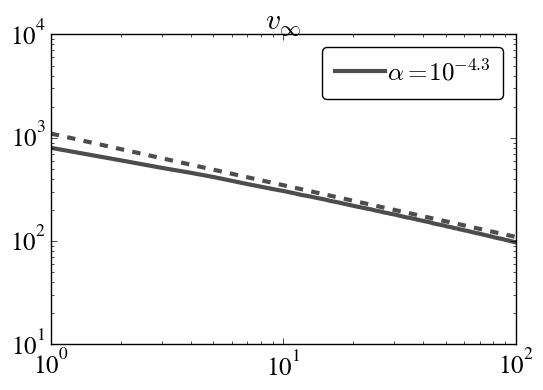

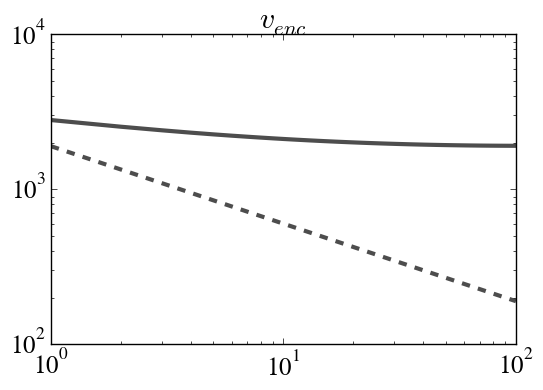

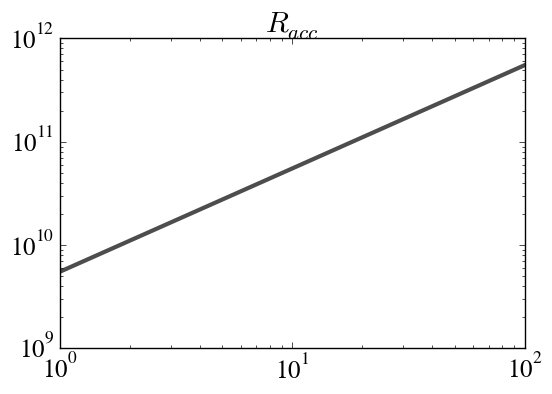

In [62]:
style_arr = [None] * len(masses)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(work_arr)):
    line, = plt.loglog(a_au_arr,v_p_arr[i],label=r'$\alpha = 10^{%.3g}$'\
                                %np.log10(masses[i]))
    plt.loglog(a_au_arr,v_shear_arr[i],linestyle="dashed",color=line.get_color())

# plt.loglog(r_arr,np.full(len(r_arr),1),linestyle='dashed')

plt.gca().legend(loc='best',fancybox=True)

plt.title(r"$v_\infty$")

fig = plt.figure(2)

style_arr = [None] * len(alphas)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(work_arr)):
    line, = plt.loglog(a_au_arr,v_pg_arr[i],label=r'$\alpha = 10^{%.3g}$'\
                                %np.log10(masses[i]))
    plt.loglog(a_au_arr,v_grav_arr[i],linestyle="dashed",color=line.get_color())

# plt.loglog(r_arr,np.full(len(r_arr),1),linestyle='dashed')

# plt.gca().legend(loc='best',fancybox=True)

plt.title(r"$v_{enc}$")


fig = plt.figure(3)

style_arr = [None] * len(alphas)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(work_arr)):
    line, = plt.loglog(a_au_arr,r_acc_arr[i],label=r'$\alpha = 10^{%.3g}$'\
                                %np.log10(masses[i]))
#     plt.loglog(r_arr,ke_arr[i],linestyle="dashed",color=line.get_color())

# plt.loglog(r_arr,np.full(len(r_arr),1),linestyle='dashed')

# plt.gca().legend(loc='best',fancybox=True)

plt.title(r"$R_{acc}$")

# Compare $t_{grow}$ Expressions to OK10, and LJ12

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


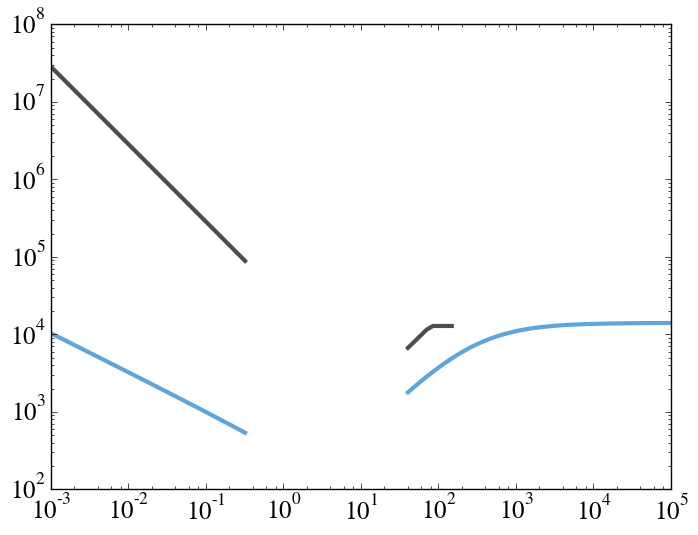

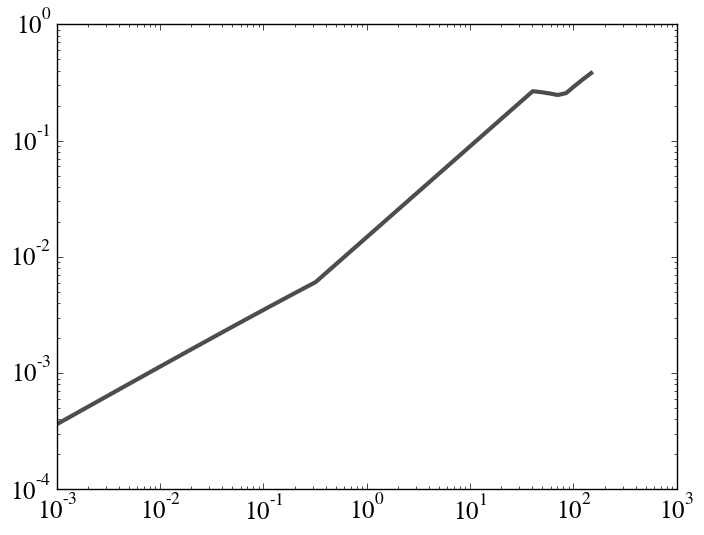

In [41]:
a_au = 30.
m_core = 1e-4
alpha = 1e-100
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

radii = np.logspace(-3,5,num=100.)
len_arr = np.zeros((len(radii),4))
st_arr = np.zeros(len(radii))
t_grow = np.zeros(len(radii))
t_OK10 = np.zeros(len(radii))
b_set = np.zeros(len(radii))
b_3b = np.zeros(len(radii))
v_a = np.zeros(len(radii))

for i,rad in enumerate(radii):
    len_arr[i,:] = TvsR_sng(a_au=a_au,m_earths=m_core,alph=alpha,r=rad,out='len')
    t_grow[i], st_arr[i] = TvsR_sng(a_au=a_au,m_earths=m_core,alph=alpha,r=rad,out='st')
    
r_ws = len_arr[:,1]
r_h = len_arr[:,2]
v_h = r_h*om
v_drift = eta*v_kep*(1. + 4.*st_arr**2.)**(1./2.)/(1 + st_arr**2.)
v_turb = np.sqrt(alpha)*c_s*np.minimum(2*st_arr,(1+st_arr)**(-1.))
min_1 = np.minimum((12.*st_arr*v_h/v_turb)**(1./2.),(12.*st_arr*v_h/v_drift)**(1./2.))
r_chamb = np.minimum(min_1,(12.*st_arr)**(1./3.))*r_h

zeta_w = eta*v_kep/v_h

# for i,st in enumerate(st_arr):
#     if (st>12./zeta_w[i]**3. and st<zeta_w[i]):
#         t_OK10[i] = 0.
#     elif st<1.:
#         b_set[i] = np.sqrt(12.*st/zeta_w[i])*r_h[i]
#         v_a[i] = (3.*b_set[i]/2./r_h[i] + zeta_w[i])*v_h[i]
#         dM_dt = 2.*b_set[i]*v_a[i]*sigma_p
#         t_OK10[i] = fn.m_earth*m_core/dM_dt*fn.sec_to_years
#     else:
#         R_p = (3.*fn.m_earth*m_core/4./np.pi/rho_s)**(1./3.)
#         alpha_p = R_p/r_h[i]
#         b_set[i] = (1.7*alpha_p**(1./2.) + 1.0/st)*r_h[i]
#         v_a[i] = 3.2*v_h[i]
#         dM_dt = 2.*b_set[i]*v_a[i]*sigma_p
#         t_OK10[i] = fn.m_earth*m_core/dM_dt*fn.sec_to_years

for i,st in enumerate(st_arr):
    if (st<12./zeta_w[i]**3. and st<1.):
        b_set[i] = np.sqrt(12.*st/zeta_w[i])*r_h[i]
        v_a[i] = (3.*b_set[i]/2./r_h[i] + zeta_w[i])*v_h[i]
        dM_dt = 2.*b_set[i]*v_a[i]*sigma_p
        t_OK10[i] = fn.m_earth*m_core/dM_dt*fn.sec_to_years
    elif (st>1. and st>zeta_w[i]):
        R_p = (3.*fn.m_earth*m_core/4./np.pi/rho_s)**(1./3.)
        alpha_p = R_p/r_h[i]
#         b_set[i] = (1.7*alpha_p**(1./2.) + 1.0/st)*r_h[i]
        b_3b[i] = (1.7*alpha_p**(1./2.) + 1.0/st)*r_h[i]
        v_a[i] = 3.2*v_h[i]
        dM_dt = 2.*b_3b[i]*v_a[i]*sigma_p
        t_OK10[i] = fn.m_earth*m_core/dM_dt*fn.sec_to_years
        print 'yes'
    else:
        t_OK10[i] = 0.
        

plt.figure(1,figsize=(8,6))
plt.loglog(radii,t_grow)
plt.loglog(radii,t_OK10)

plt.figure(2,figsize=(8,6))
plt.loglog(radii[np.where(t_grow!=0)],t_OK10[np.where(t_grow!=0)]/t_grow[np.where(t_grow!=0)])

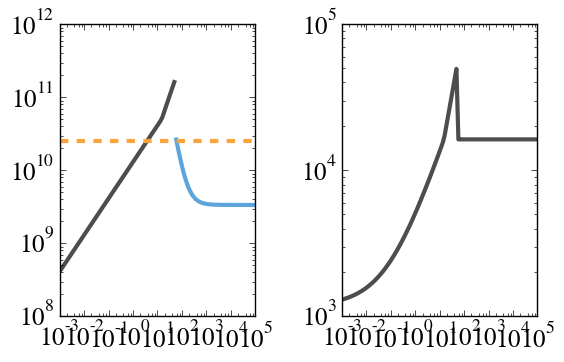

In [5]:
plt.subplot(121)
plt.loglog(radii,b_set)
plt.loglog(radii,b_3b)
plt.loglog(radii,r_h,linestyle='dashed')
plt.subplot(122)
plt.loglog(radii,v_a)

plt.tight_layout()

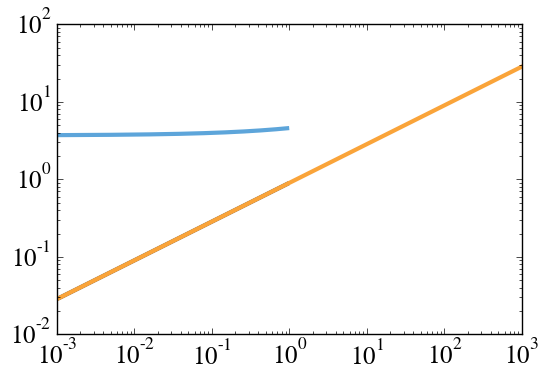

In [103]:
plt.loglog(radii,b_set/r_h)
plt.loglog(radii,v_a/v_h)
plt.loglog(radii,2*r_ws/r_h)

# Detailed Comparison w/OK10

In [14]:
alphas = [1e-100]
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0

M = 1e-4

r_arr = np.logspace(-3,5,num=1000)

h_p_arr = np.zeros((len(alphas),len(r_arr)))
r_acc_arr = np.zeros((len(alphas),len(r_arr)))
h_acc_arr = np.zeros((len(alphas),len(r_arr)))
v_inf_arr = np.zeros((len(alphas),len(r_arr)))
# r_acc_arr = np.zeros((len(alphas),len(r_arr)))

time_arr = np.zeros((len(alphas),len(r_arr)))
st_arr = np.zeros((len(alphas),len(r_arr)))

# work_arr = v_p_arr

# alpha = 1e-2

for k,alph in enumerate(alphas):
    for i,r_s in enumerate(r_arr):
        h_p_arr[k,i], tmp, r_acc_arr[k,i], h_acc_arr[k,i], v_inf_arr[k,i] = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj)

In [15]:
a_au = 30.
m_core = 1e-4
alpha = 1e-100
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

radii = np.logspace(-3,5,num=100.)
len_arr = np.zeros((len(radii),4))
st_arr = np.zeros(len(radii))
t_grow = np.zeros(len(radii))
t_OK10 = np.zeros(len(radii))
b_set = np.zeros(len(radii))
b_3b = np.zeros(len(radii))
v_a = np.zeros(len(radii))

for i,rad in enumerate(radii):
    len_arr[i,:] = TvsR_sng(a_au=a_au,m_earths=m_core,alph=alpha,r=rad,out='len')
    t_grow[i], st_arr[i] = TvsR_sng(a_au=a_au,m_earths=m_core,alph=alpha,r=rad,out='st')
    
r_ws = len_arr[:,1]
r_h = len_arr[:,2]
v_h = r_h*om
v_drift = eta*v_kep*(1. + 4.*st_arr**2.)**(1./2.)/(1 + st_arr**2.)
v_turb = np.sqrt(alpha)*c_s*np.minimum(2*st_arr,(1+st_arr)**(-1.))
min_1 = np.minimum((12.*st_arr*v_h/v_turb)**(1./2.),(12.*st_arr*v_h/v_drift)**(1./2.))
r_chamb = np.minimum(min_1,(12.*st_arr)**(1./3.))*r_h

zeta_w = eta*v_kep/v_h

# for i,st in enumerate(st_arr):
#     if (st>12./zeta_w[i]**3. and st<zeta_w[i]):
#         t_OK10[i] = 0.
#     elif st<1.:
#         b_set[i] = np.sqrt(12.*st/zeta_w[i])*r_h[i]
#         v_a[i] = (3.*b_set[i]/2./r_h[i] + zeta_w[i])*v_h[i]
#         dM_dt = 2.*b_set[i]*v_a[i]*sigma_p
#         t_OK10[i] = fn.m_earth*m_core/dM_dt*fn.sec_to_years
#     else:
#         R_p = (3.*fn.m_earth*m_core/4./np.pi/rho_s)**(1./3.)
#         alpha_p = R_p/r_h[i]
#         b_set[i] = (1.7*alpha_p**(1./2.) + 1.0/st)*r_h[i]
#         v_a[i] = 3.2*v_h[i]
#         dM_dt = 2.*b_set[i]*v_a[i]*sigma_p
#         t_OK10[i] = fn.m_earth*m_core/dM_dt*fn.sec_to_years

for i,st in enumerate(st_arr):
    if (st<12./zeta_w[i]**3. and st<1.):
#         b_set[i] = np.sqrt(12.*st/zeta_w[i])*r_h[i]
        b_set_func = lambda b: b**3. + 2*zeta_w[i]/3.*b**2. - 8.*st
        b_set[i] = opt.fsolve(b_set_func,st)[0]*r_h[i]
        v_a[i] = (3.*b_set[i]/2./r_h[i] + zeta_w[i])*v_h[i]
        dM_dt = 2.*b_set[i]*v_a[i]*sigma_p
        t_OK10[i] = fn.m_earth*m_core/dM_dt*fn.sec_to_years
    elif (st>1. and st>zeta_w[i]):
        R_p = (3.*fn.m_earth*m_core/4./np.pi/rho_s)**(1./3.)
        alpha_p = R_p/r_h[i]
        b_set[i] = (1.7*alpha_p**(1./2.) + 1.0/st)*r_h[i]
#         b_3b[i] = (1.7*alpha_p**(1./2.) + 1.0/st)*r_h[i]
        v_a[i] = 3.2*v_h[i]
        dM_dt = 2.*b_set[i]*v_a[i]*sigma_p
        t_OK10[i] = fn.m_earth*m_core/dM_dt*fn.sec_to_years
#         print 'yes'
    else:
        t_OK10[i] = 0.
        

# plt.figure(1,figsize=(8,6))
# plt.loglog(radii,t_grow)
# plt.loglog(radii,t_OK10)

# plt.figure(2,figsize=(8,6))
# plt.loglog(radii[np.where(t_grow!=0)],t_OK10[np.where(t_grow!=0)]/t_grow[np.where(t_grow!=0)])

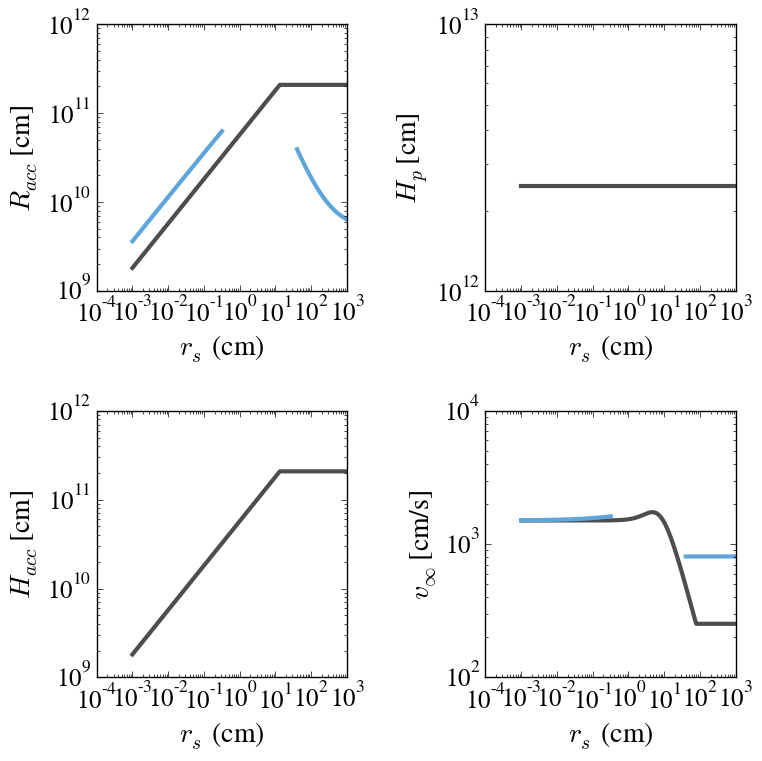

In [16]:
fig = plt.figure(1,figsize=(8,8))

xlim = [1e-4,1e3]

plt.subplot(221)

style_arr = [None] * len(alphas)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alphas)):
    line_list.append(plt.loglog(r_arr,r_acc_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphas[i]) if i else r"$\alpha = 0$"))

for i in range(len(alphas)):
    line_list[i][0].set_dashes(style_arr[i])
    
plt.xlabel(r"$r_s$ (cm)",fontsize=20)
plt.ylabel(r"$R_{acc}$ [cm]",fontsize=20)
plt.xlim(xlim)

plt.loglog(radii,b_set)

#Next subplot
plt.subplot(222)

style_arr = [None] * len(alphas)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alphas)):
    line_list.append(plt.loglog(r_arr,h_p_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphas[i]) if i else r"$\alpha = 0$"))

for i in range(len(alphas)):
    line_list[i][0].set_dashes(style_arr[i])
    
plt.xlabel(r"$r_s$ (cm)",fontsize=20)
plt.ylabel(r"$H_{p}$ [cm]",fontsize=20)
plt.xlim(xlim)

#Next subplot
plt.subplot(223)

style_arr = [None] * len(alphas)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alphas)):
    line_list.append(plt.loglog(r_arr,h_acc_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphas[i]) if i else r"$\alpha = 0$"))

for i in range(len(alphas)):
    line_list[i][0].set_dashes(style_arr[i])
    
plt.xlabel(r"$r_s$ (cm)",fontsize=20)
plt.ylabel(r"$H_{acc}$ [cm]",fontsize=20)
plt.xlim(xlim)

#Next subplot
plt.subplot(224)

style_arr = [None] * len(alphas)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alphas)):
    line_list.append(plt.loglog(r_arr,v_inf_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphas[i]) if i else r"$\alpha = 0$"))

for i in range(len(alphas)):
    line_list[i][0].set_dashes(style_arr[i])
    
plt.xlabel(r"$r_s$ (cm)",fontsize=20)
plt.ylabel(r"$v_{\infty}$ [cm/s]",fontsize=20)
plt.xlim(xlim)

plt.loglog(radii,v_a)

plt.tight_layout()

In [59]:
12/zeta_w**3.

array([ 0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05679102,
        0.05679102,  0.05679102,  0.05679102,  0.05679102,  0.05

In [ ]:
plt.loglog()

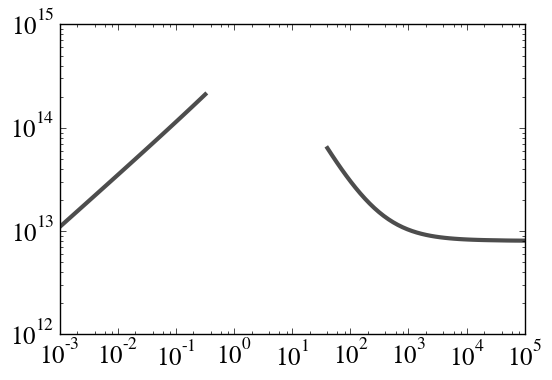

In [60]:
plt.loglog(radii,2.*b_set*v_a)

# $P_{col}$ as a function of mass

In [98]:
alphas = [1e-100]
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0
a_au = semi_maj

st = 1e-2
r_s = st_solver(st=st,a_au=semi_maj)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

M_arr = np.logspace(-5,1,num=1000)

h_p_arr = np.zeros((len(alphas),len(M_arr)))
r_acc_arr = np.zeros((len(alphas),len(M_arr)))
h_acc_arr = np.zeros((len(alphas),len(M_arr)))
v_inf_arr = np.zeros((len(alphas),len(M_arr)))
b_set = np.zeros(len(M_arr))
v_a = np.zeros(len(M_arr))
zeta_w_arr = np.zeros(len(M_arr))
r_h_arr = np.zeros(len(M_arr))
b_sol = np.zeros(len(M_arr))
# r_acc_arr = np.zeros((len(alphas),len(r_arr)))

time_arr = np.zeros((len(alphas),len(M_arr)))
st_arr = np.zeros((len(alphas),len(M_arr)))

# work_arr = v_p_arr

# alpha = 1e-2

for k,alph in enumerate(alphas):
    for i,M in enumerate(M_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj)
        if time!=0:
            h_p_arr[k,i], tmp, r_acc_arr[k,i], h_acc_arr[k,i], v_inf_arr[k,i] = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj)
        r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
        v_h = r_h*om
        zeta_w = eta*v_kep/(r_h*om)
        zeta_w_arr[i] = zeta_w
        r_h_arr[i] = r_h
        st_str = 12./zeta_w**3.
        if (st<12./zeta_w**3. and st<1.):
            b_set_func = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8.*st
            b_sol[i] = opt.brentq(b_set_func,0,5)
#             b_sol[i] = opt.fsolve(b_set_func,zeta_w)[0]
            b_set[i] = b_sol[i]*r_h
#             b_set[i] = b_sol[i]*np.exp(-(st/st_str)**(0.65))*r_h
            v_a[i] = (3.*b_set[i]/2./r_h + zeta_w)*v_h
        elif (st>1. and st>zeta_w):
            b_set[i] = (1.0/st)*r_h
            v_a[i] = 3.2*v_h

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


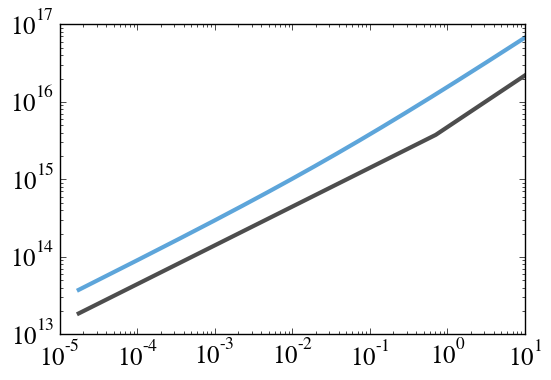

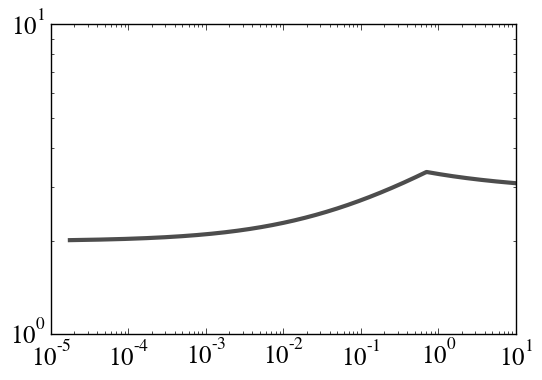

In [99]:
plt.loglog(M_arr,2*r_acc_arr[0]*v_inf_arr[0])
plt.loglog(M_arr,2*b_set*v_a)

plt.figure(2)
plt.loglog(M_arr,2*b_set*v_a/(2*r_acc_arr[0]*v_inf_arr[0]))

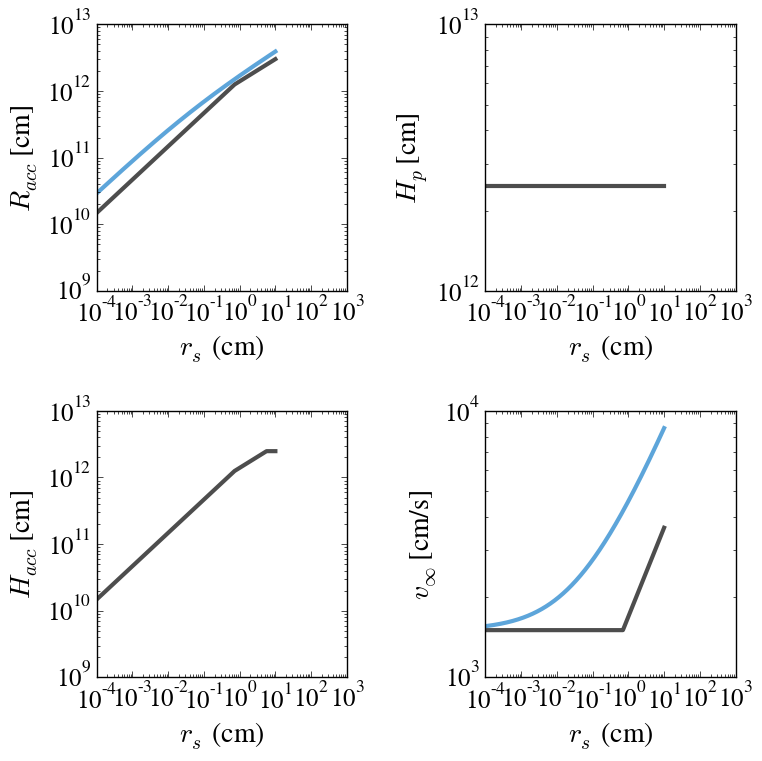

In [100]:
fig = plt.figure(1,figsize=(8,8))

xlim = [1e-4,1e3]

plt.subplot(221)

style_arr = [None] * len(alphas)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alphas)):
    line_list.append(plt.loglog(M_arr,r_acc_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphas[i]) if i else r"$\alpha = 0$"))

for i in range(len(alphas)):
    line_list[i][0].set_dashes(style_arr[i])
    
plt.xlabel(r"$r_s$ (cm)",fontsize=20)
plt.ylabel(r"$R_{acc}$ [cm]",fontsize=20)
plt.xlim(xlim)

plt.loglog(M_arr,b_set)

#Next subplot
plt.subplot(222)

style_arr = [None] * len(alphas)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alphas)):
    line_list.append(plt.loglog(M_arr,h_p_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphas[i]) if i else r"$\alpha = 0$"))

for i in range(len(alphas)):
    line_list[i][0].set_dashes(style_arr[i])
    
plt.xlabel(r"$r_s$ (cm)",fontsize=20)
plt.ylabel(r"$H_{p}$ [cm]",fontsize=20)
plt.xlim(xlim)

#Next subplot
plt.subplot(223)

style_arr = [None] * len(alphas)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alphas)):
    line_list.append(plt.loglog(M_arr,h_acc_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphas[i]) if i else r"$\alpha = 0$"))

for i in range(len(alphas)):
    line_list[i][0].set_dashes(style_arr[i])
    
plt.xlabel(r"$r_s$ (cm)",fontsize=20)
plt.ylabel(r"$H_{acc}$ [cm]",fontsize=20)
plt.xlim(xlim)

#Next subplot
plt.subplot(224)

style_arr = [None] * len(alphas)
style_arr[0] = []

for i in range(len(alphas)-1):
    style_add = [3,5] if i else [9,5]
    style_arr[i+1] = style_arr[i] + style_add

line_list = []

for i in range(len(alphas)):
    line_list.append(plt.loglog(M_arr,v_inf_arr[i],label=r'$\alpha = 10^{%.3g}$' %np.log10(alphas[i]) if i else r"$\alpha = 0$"))

for i in range(len(alphas)):
    line_list[i][0].set_dashes(style_arr[i])
    
plt.xlabel(r"$r_s$ (cm)",fontsize=20)
plt.ylabel(r"$v_{\infty}$ [cm/s]",fontsize=20)
plt.xlim(xlim)

plt.loglog(M_arr,v_a)

plt.tight_layout()

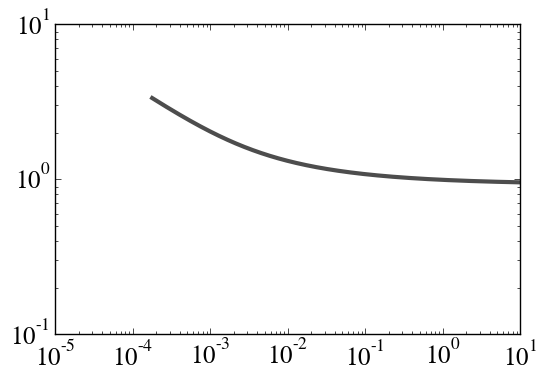

In [79]:
# plt.loglog(M_arr,2*np.sqrt(st/zeta_w_arr)*r_h_arr)
# plt.loglog(M_arr,b_sol)
plt.loglog(M_arr,b_sol)

In [77]:
zeta_w_arr[216]

4.7409797522307597

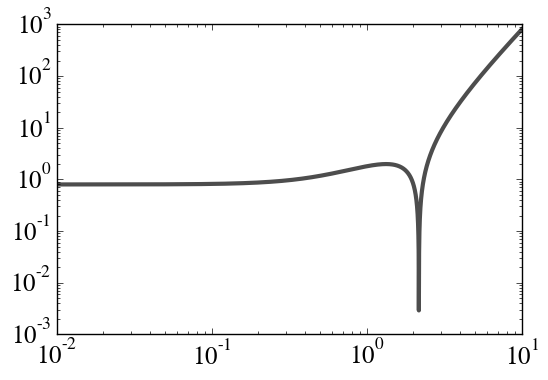

In [48]:
st = 0.1
zeta_w = 3.
b = np.logspace(-2,1,num=10000)
plt.loglog(b,np.abs(b**3. - 2.*zeta_w/3.*b**2.-8*st))

# Now with Turbulence

In [12]:
alphas = [1e-100]
# alphas = masses
# masses = [1e0]
#
semi_maj = 10.0
a_au = semi_maj

st = 9e-1
r_s = st_solver(st=st,a_au=semi_maj)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

M_arr = np.logspace(-5,1,num=1000)

h_p_arr = np.zeros((len(alphas),len(M_arr)))
r_acc_arr = np.zeros((len(alphas),len(M_arr)))
h_acc_arr = np.zeros((len(alphas),len(M_arr)))
v_inf_arr = np.zeros((len(alphas),len(M_arr)))
b_set = np.zeros(len(M_arr))
v_a = np.zeros(len(M_arr))
zeta_w_arr = np.zeros(len(M_arr))
r_h_arr = np.zeros(len(M_arr))
b_sol = np.zeros(len(M_arr))
# r_acc_arr = np.zeros((len(alphas),len(r_arr)))

time_arr = np.zeros((len(alphas),len(M_arr)))
st_arr = np.zeros((len(alphas),len(M_arr)))

# work_arr = v_p_arr

# alpha = 1e-2

for k,alph in enumerate(alphas):
    for i,M in enumerate(M_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        if time!=0:
            h_p_arr[k,i], tmp, r_acc_arr[k,i], h_acc_arr[k,i], v_inf_arr[k,i] = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj)
        r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
        v_h = r_h*om
        v_gas = np.sqrt((eta*v_kep)**2.+(np.sqrt(alph)*c_s)**2.)
        zeta_w = v_gas/(r_h*om)
        zeta_w_arr[i] = zeta_w
        r_h_arr[i] = r_h
        st_str = 12./zeta_w**3.
        if (st<12./zeta_w**3. and st<1.):
            b_set_func = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8.*st
            b_sol[i] = opt.brentq(b_set_func,0,5)
#             b_sol[i] = opt.fsolve(b_set_func,zeta_w)[0]
            b_set[i] = b_sol[i]*r_h
#             b_set[i] = b_sol[i]*np.exp(-(st/st_str)**(0.65))*r_h
            v_a[i] = (3.*b_set[i]/2./r_h + zeta_w)*v_h
        elif (st>1. and st>zeta_w):
            b_set[i] = (1.0/st)*r_h
            v_a[i] = 3.2*v_h

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


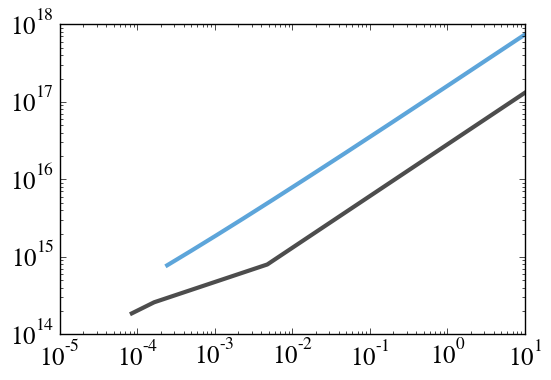

//anaconda/lib/python2.7/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


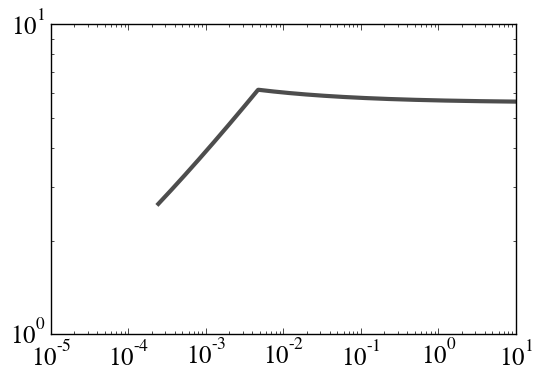

In [13]:
plt.loglog(M_arr,2*r_acc_arr[0]*v_inf_arr[0])
plt.loglog(M_arr,2*b_set*v_a)

plt.figure(2)
plt.loglog(M_arr,2*b_set*v_a/(2*r_acc_arr[0]*v_inf_arr[0]))

# Heatmaps

In [2]:
# alphas = [1e-2]
alph = 1e-100
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0
a_au = semi_maj

r_s_arr = np.logspace(-4,4,num=300)
M_arr = np.logspace(-5,2,num=200)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

# M_arr = np.logspace(-5,1,num=1000)

p_col_mmr = np.zeros((len(M_arr),len(r_s_arr)))
p_col_OK = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
st_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_OK10 = np.zeros((len(M_arr),len(r_s_arr)))
zeta_w_arr = np.zeros(len(M_arr))

# work_arr = v_p_arr

# alpha = 1e-2

for i,M in enumerate(M_arr):
    for j,r_s in enumerate(r_s_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        time_arr[i,j] = time
        st_arr[i,j] = st
        if time!=0:
            tmp, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)
            p_col_mmr[i,j] = 2*r_acc*v_inf
        else:
            p_col_mmr[i,j] = 1e100
        r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
        v_h = r_h*om
        v_gas = np.sqrt((eta*v_kep)**2.+(np.sqrt(alph)*c_s)**2.)
        zeta_w = v_gas/(r_h*om)
        st_str = 12./zeta_w**3.
        st = st_rad(rad=r_s,a_au=semi_maj)
        if (st<12./zeta_w**3. and st<1.):
            b_set_func = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8.*st
            b_sol = opt.brentq(b_set_func,0,5)
#             b_sol[i] = opt.fsolve(b_set_func,zeta_w)[0]
            b_set = b_sol*r_h
#             b_set[i] = b_sol[i]*np.exp(-(st/st_str)**(0.65))*r_h
            v_a = (3.*b_set/2./r_h + zeta_w)*v_h
            p_col_OK[i,j] = 2*b_set*v_a
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years
        elif (st>1. and st>zeta_w):
            b_set = (1.0/st)*r_h
            v_a = 3.2*v_h
            p_col_OK[i,j] = 2*b_set*v_a
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years
        else:
            p_col_OK[i,j] = 1e100
    if i%10 ==0:
        print i

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [109]:
for i,M in enumerate(M_arr):
    r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
    v_h = r_h*om
    v_gas = np.sqrt((eta*v_kep)**2.+(np.sqrt(alph)*c_s)**2.)
    zeta_w_arr[i] = v_gas/(r_h*om)

In [103]:
np.where(zeta_w_arr>1)
print M_arr[105]

0.0493704785284


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


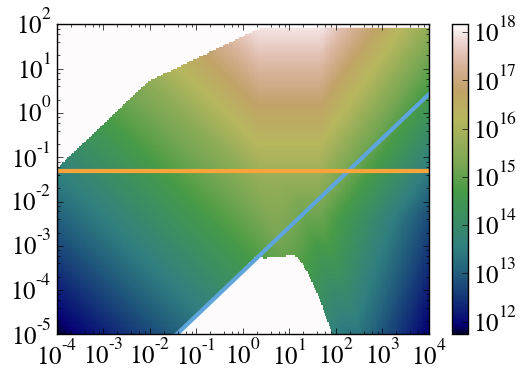

In [3]:
plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_mmr, cmap='gist_earth',norm=LogNorm(),vmax=np.amax(p_col_mmr[np.where(p_col_mmr!=1e100)]))
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

plt.loglog(r_s_arr,3*alph**(3./2.)*c_s**3./(st_arr[0])**(3./2.)/v_kep**3.*fn.m_sun/fn.m_earth)
plt.loglog(r_s_arr,(1./4.)*(v_gas)**3./v_kep**3.*st_arr[0]*fn.m_sun/fn.m_earth)
# plt.loglog(r_s_arr,np.full(len(r_s_arr),eta**3/4.*fn.m_sun/fn.m_earth))
plt.loglog(r_s_arr,np.full(len(r_s_arr),M_arr[105]))

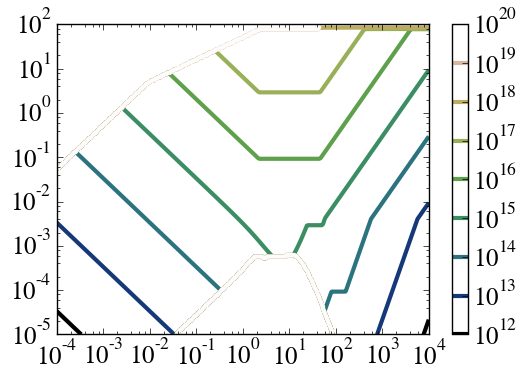

In [154]:
plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

V = [1e12,1e13,1e14,1e15,1e16,1e17,1e18,1e19,1e20]

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.contour(X,Y,p_col_mmr, cmap='gist_earth',norm=LogNorm(),levels=V)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

# plt.loglog(r_s_arr,3*alph**(3./2.)*c_s**3./(st_arr[0])**(3./2.)/v_kep**3.*fn.m_sun/fn.m_earth)
# plt.loglog(r_s_arr,(1./4.)*(v_gas)**3./v_kep**3.*st_arr[0]*fn.m_sun/fn.m_earth)
# # plt.loglog(r_s_arr,np.full(len(r_s_arr),eta**3/4.*fn.m_sun/fn.m_earth))
# plt.loglog(r_s_arr,np.full(len(r_s_arr),M_arr[105]))

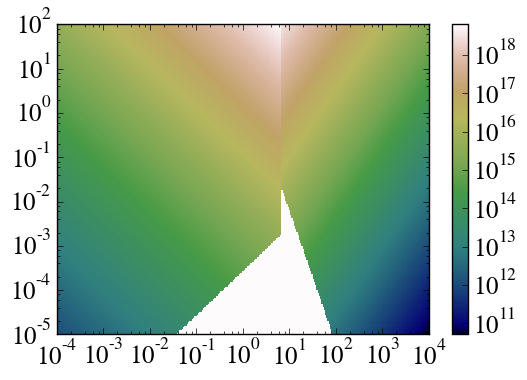

In [143]:
X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_OK, cmap='gist_earth',norm=LogNorm(),vmax=np.amax(p_col_OK[np.where(p_col_OK!=1e100)]))
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

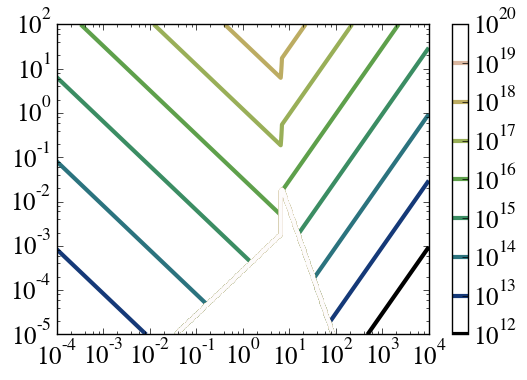

In [155]:
X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.contour(X,Y,p_col_OK, cmap='gist_earth',norm=LogNorm(),levels=V)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

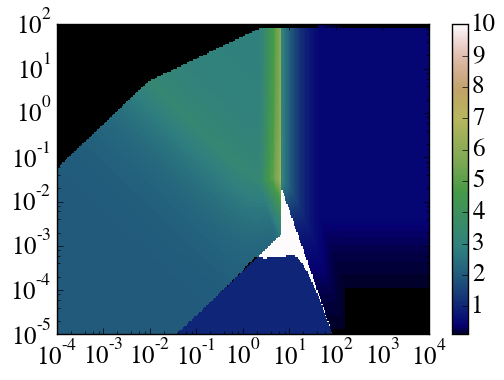

In [148]:
X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_OK/p_col_mmr, cmap='gist_earth',vmin=1e-1,vmax=1e1)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

# Plot Growth Timescale

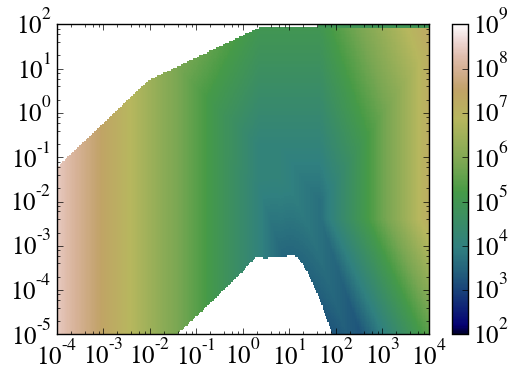

In [4]:
X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_arr, cmap='gist_earth',norm=LogNorm(),vmin=1e2,vmax=1e9)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

//anaconda/lib/python2.7/site-packages/matplotlib/contour.py:1515: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


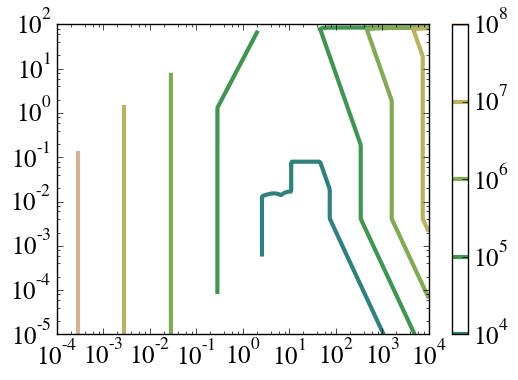

In [5]:
X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.contour(X,Y,time_arr, cmap='gist_earth',norm=LogNorm(),vmin=1e2,vmax=1e9)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

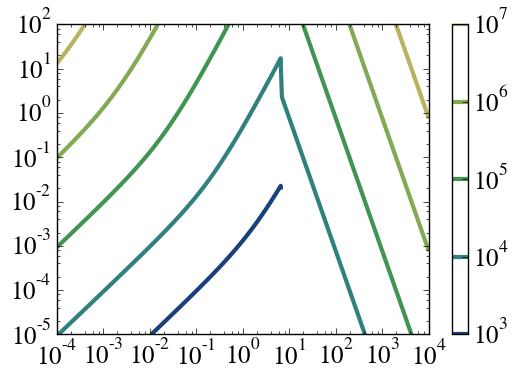

In [6]:
X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.contour(X,Y,time_OK10, cmap='gist_earth',norm=LogNorm(),vmin=1e2,vmax=1e9)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

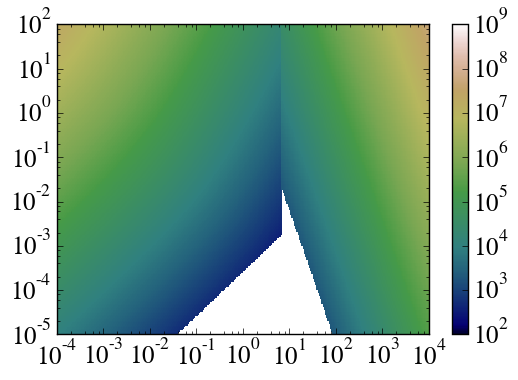

In [145]:
X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_OK10, cmap='gist_earth',norm=LogNorm(),vmin=1e2,vmax=1e9)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

# Go straight from $P_{col}$ to $t_{grow}$ (i.e. assume 2D)

In [122]:
# alphas = [1e-2]
alph = 1e-100
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0
a_au = semi_maj

r_s_arr = np.logspace(-4,4,num=300)
M_arr = np.logspace(-5,2,num=200)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

# M_arr = np.logspace(-5,1,num=1000)

t_2D_mmr = np.zeros((len(M_arr),len(r_s_arr)))
p_col_OK = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
st_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))

# work_arr = v_p_arr

# alpha = 1e-2

for i,M in enumerate(M_arr):
    for j,r_s in enumerate(r_s_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        time_arr[i,j] = time
        if time!=0:
            tmp, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)
            p_col_mmr[i,j] = (M*fn.m_earth)/(2.*r_acc*v_inf*sigma_p)*fn.sec_to_years
        else:
            p_col_mmr[i,j] = 1e100
        r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
        v_h = r_h*om
        v_gas = np.sqrt((eta*v_kep)**2.+(np.sqrt(alph)*c_s)**2.)
        zeta_w = v_gas/(r_h*om)
        st_str = 12./zeta_w**3.
        st = st_rad(rad=r_s,a_au=semi_maj)
        if (st<12./zeta_w**3. and st<1.):
            b_set_func = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8.*st
            b_sol = opt.brentq(b_set_func,0,5)
#             b_sol[i] = opt.fsolve(b_set_func,zeta_w)[0]
            b_set = b_sol*r_h
#             b_set[i] = b_sol[i]*np.exp(-(st/st_str)**(0.65))*r_h
            v_a = (3.*b_set/2./r_h + zeta_w)*v_h
            p_col_OK[i,j] = 2*b_set*v_a
        elif (st>1. and st>zeta_w):
            b_set = (1.0/st)*r_h
            v_a = 3.2*v_h
            p_col_OK[i,j] = (M*fn.m_earth)/(2*b_set*v_a*sigma_p)*fn.sec_to_years
        else:
            p_col_OK[i,j] = 1e100
    if i%10 ==0:
        print i

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


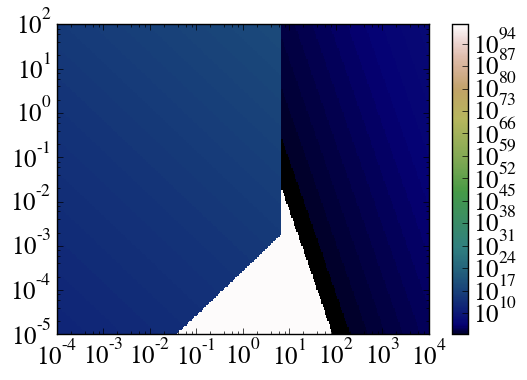

In [123]:
X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_OK, cmap='gist_earth',norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

# Make $P_{col}$ Plot

## Check Expressions Against Fig. 9 of OK10

In [2]:
st_arr = np.linspace(-4,4,num=500)
zeta_w_arr = np.linspace(-2,4,num=500)

p_col = np.zeros((len(st_arr),len(zeta_w_arr)))

alpha_p = 1e-3

for i,log_zeta_w in enumerate(zeta_w_arr):
    for j,log_st in enumerate(st_arr):
        st = 10.**log_st
        zeta_w = 10.**log_zeta_w
        if (st<12./zeta_w**3. and st<1.):
            st_str = 12/zeta_w**3.
            gamma = 0.65
            b_set = np.sqrt(12.*st/zeta_w)*np.exp(-(st/st_str)**gamma)
            v_a = (3.*b_set/2. + zeta_w)
            p_col[i,j] = 2*b_set*v_a
        elif (st>1. and st>zeta_w):
            b_3b = (1.7*alpha_p**(1./2.) + 1.0/st)
            v_a = 3.2
            p_col[i,j] = 2.*b_3b*v_a
        else:
            v_a = zeta_w*np.sqrt(1. + 4.*st**2.)/(1 + st**2.)
            b_hyp = alpha_p*np.sqrt(1 + 6./(alpha_p + v_a**2.))
            p_col[i,j] = 2.*b_hyp*v_a
            
log_p_simp = np.log10(p_col)


In [79]:
st_arr = np.linspace(-4,4,num=500)
zeta_w_arr = np.linspace(-2,4,num=500)

p_col = np.zeros((len(st_arr),len(zeta_w_arr)))

alpha_p = 1e-3

for i,log_zeta_w in enumerate(zeta_w_arr):
    for j,log_st in enumerate(st_arr):
        st = 10.**log_st
        zeta_w = 10.**log_zeta_w
        if (st<12./zeta_w**3. and st<1.):
            st_str = 12/zeta_w**3.
            gamma = 0.65
            b_set = min(np.sqrt(12.*st/zeta_w)*np.exp(-(st/st_str)**gamma),1)
            v_a = (3.*b_set/2. + zeta_w)
            p_col[i,j] = 2*b_set*v_a
        elif (st>1. and st>zeta_w):
            b_3b = (1.7*alpha_p**(1./2.) + 1.0/st)
            v_a = 3.2
            p_col[i,j] = 2.*b_3b*v_a
        else:
            v_a = zeta_w*np.sqrt(1. + 4.*st**2.)/(1 + st**2.)
            b_hyp = alpha_p*np.sqrt(1 + 6./(alpha_p + v_a**2.))
            p_col[i,j] = 2.*b_hyp*v_a
            
log_p_max = np.log10(p_col)


In [105]:
st_arr = np.linspace(-4,4,num=500)
zeta_w_arr = np.linspace(-2,4,num=500)

p_col = np.zeros((len(st_arr),len(zeta_w_arr)))

alpha_p = 1e-3

for i,log_zeta_w in enumerate(zeta_w_arr):
    for j,log_st in enumerate(st_arr):
        st = 10.**log_st
        zeta_w = 10.**log_zeta_w
        if (st<12./zeta_w**3. and st<1.):
            st_str = 12/zeta_w**3.
            gamma = 0.65
            b_eqn = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8*st
            b_set = opt.fsolve(b_eqn,np.sqrt(12.*st/zeta_w))
            v_a = (3.*b_set/2. + zeta_w)
            p_col[i,j] = min(2*b_set*v_a,2)
        elif (st>1. and st>zeta_w):
            b_3b = (1.7*alpha_p**(1./2.) + 1.0/st)
            v_a = 3.2
            p_col[i,j] = 2.*b_3b*v_a
        else:
            v_a = zeta_w*np.sqrt(1. + 4.*st**2.)/(1 + st**2.)
            b_hyp = alpha_p*np.sqrt(1 + 6./(alpha_p + v_a**2.))
            p_col[i,j] = 2.*b_hyp*v_a
            
log_p_noexp = np.log10(p_col)


In [77]:
st_arr = np.linspace(-4,4,num=500)
zeta_w_arr = np.linspace(-2,4,num=500)

p_col = np.zeros((len(st_arr),len(zeta_w_arr)))

alpha_p = 1e-3

for i,log_zeta_w in enumerate(zeta_w_arr):
    for j,log_st in enumerate(st_arr):
        st = 10.**log_st
        zeta_w = 10.**log_zeta_w
        if (st<12./zeta_w**3. and st<1.):
            st_str = 12/zeta_w**3.
            gamma = 0.65
            b_eqn = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8*st
            b_set_unexp = opt.fsolve(b_eqn,np.sqrt(12.*st/zeta_w))
            b_set = b_set_unexp*np.exp(-(st/st_str)**gamma)
            v_a = (3.*b_set/2. + zeta_w)
            p_col[i,j] = 2*b_set*v_a
        elif (st>1. and st>zeta_w):
            b_3b = (1.7*alpha_p**(1./2.) + 1.0/st)
            v_a = 3.2
            p_col[i,j] = 2.*b_3b*v_a
        else:
            v_a = zeta_w*np.sqrt(1. + 4.*st**2.)/(1 + st**2.)
            b_hyp = alpha_p*np.sqrt(1 + 6./(alpha_p + v_a**2.))
            p_col[i,j] = 2.*b_hyp*v_a
            
log_p = np.log10(p_col)


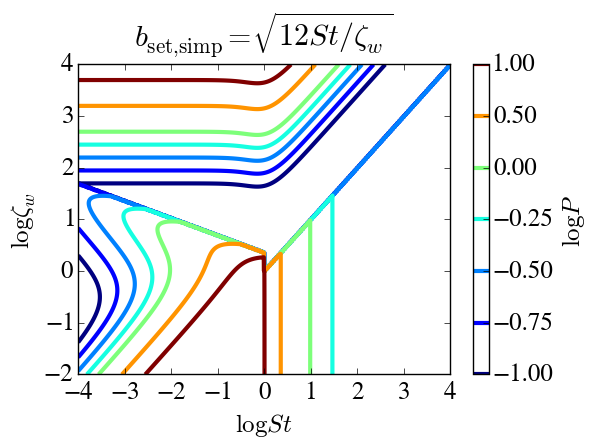

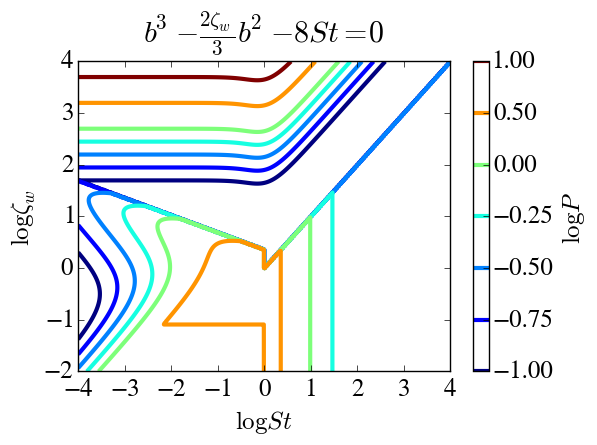

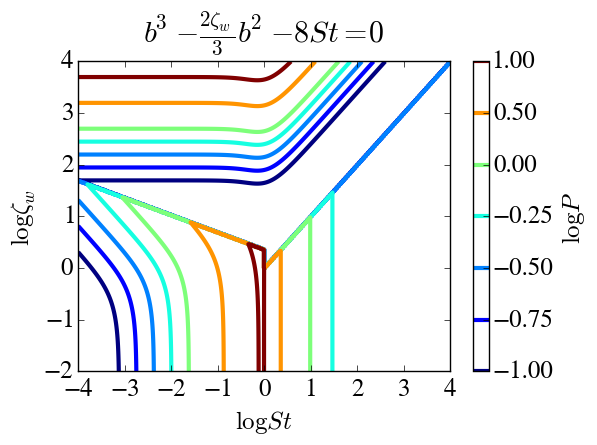

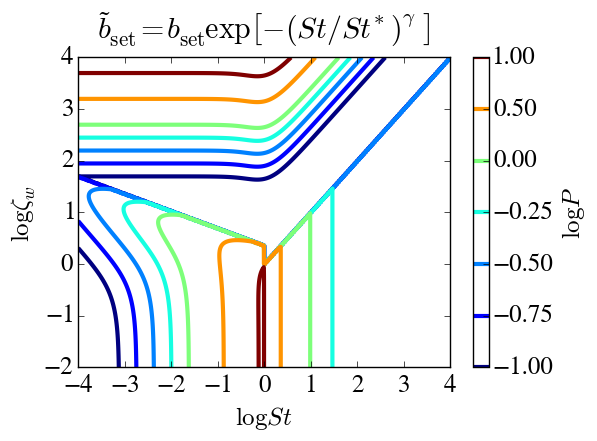

In [80]:
X, Y = np.meshgrid(st_arr, zeta_w_arr)

V = [-1.0,-0.75,-0.5,-0.25,0,0.5,1]

plt.figure(1)
CS = plt.contour(X, Y, log_p_simp,V)
plt.colorbar(CS,label=r'$\log P$')
plt.title(r'$b_{\rm{set,simp}} = \sqrt{12 St/\zeta_w}$',y=1.04)
plt.xlabel(r'$ \log St$')
plt.ylabel(r'$\log \zeta_w$')

plt.figure(2)
CS = plt.contour(X, Y, log_p_max,V)
plt.colorbar(CS,label=r'$\log P$')
plt.title(r'$b^3 - \frac{2 \zeta_w}{3} b^2 - 8 St = 0$',y=1.04)
plt.xlabel(r'$ \log St$')
plt.ylabel(r'$\log \zeta_w$')

plt.figure(3)
CS = plt.contour(X, Y, log_p_noexp,V)
plt.colorbar(CS,label=r'$\log P$')
plt.title(r'$b^3 - \frac{2 \zeta_w}{3} b^2 - 8 St = 0$',y=1.04)
plt.xlabel(r'$ \log St$')
plt.ylabel(r'$\log \zeta_w$')


plt.figure(4)
CS = plt.contour(X, Y, log_p,V)
plt.colorbar(CS,label=r'$\log P$')
plt.title(r'$\tilde{b}_{\rm{set}} = b_{\rm{set}} \exp\left[-(St/St^*)^\gamma \right]$',y=1.04)
plt.xlabel(r'$ \log St$')
plt.ylabel(r'$\log \zeta_w$')


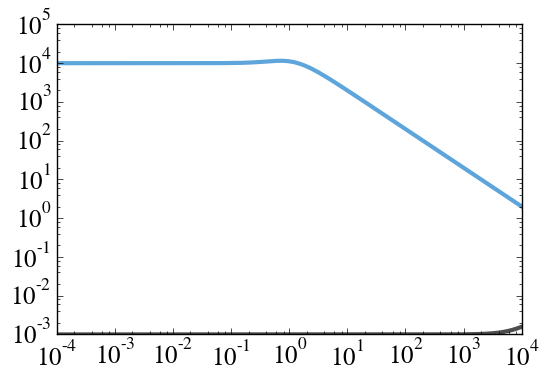

In [133]:
st_arr = np.logspace(-4,4,num=500)
zeta_w = 1e4
b_hyp = np.zeros(len(st_arr))
v_a = np.zeros(len(st_arr))

alpha_p = 1e-3

for i,st in enumerate(st_arr):
    v_a[i] = zeta_w*np.sqrt(1. + 4.*st**2.)/(1 + st**2.)
    b_hyp[i] = alpha_p*np.sqrt(1 + 6./(alpha_p + v_a[i]**2.))
    
plt.loglog(st_arr,b_hyp)
plt.loglog(st_arr,v_a)

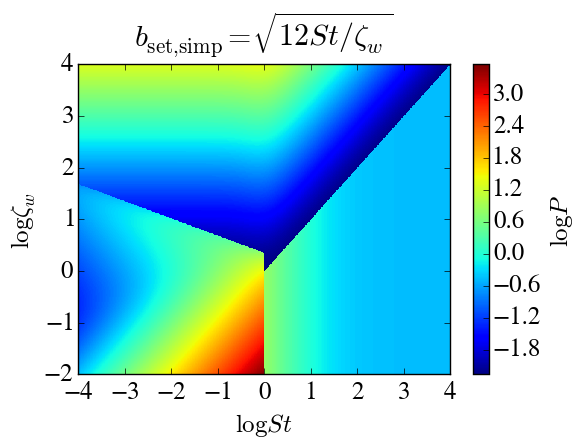

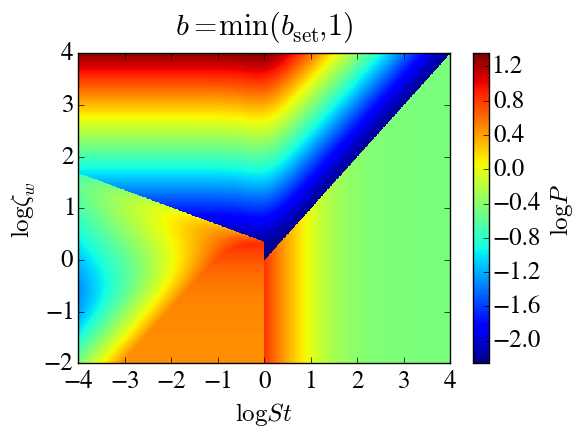

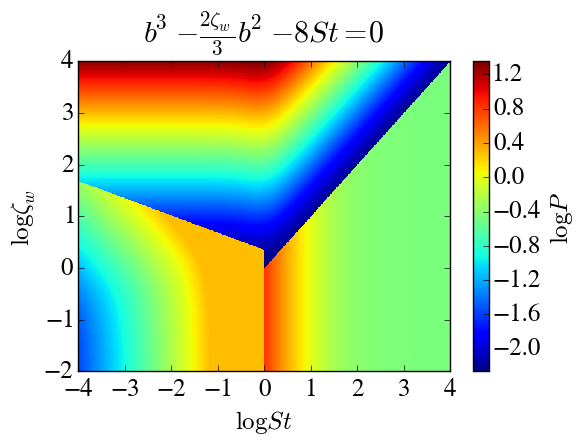

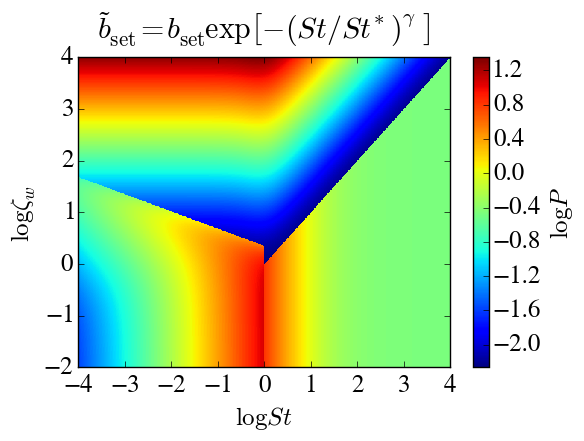

In [106]:
X, Y = np.meshgrid(st_arr, zeta_w_arr)

V = [-1.0,-0.75,-0.5,-0.25,0,0.5,1]

plt.figure(1)
CS = plt.pcolormesh(X, Y, log_p_simp)
plt.colorbar(CS,label=r'$\log P$')
plt.title(r'$b_{\rm{set,simp}} = \sqrt{12 St/\zeta_w}$',y=1.04)
plt.xlabel(r'$ \log St$')
plt.ylabel(r'$\log \zeta_w$')

plt.figure(2)
CS = plt.pcolormesh(X, Y, log_p_max)
plt.colorbar(CS,label=r'$\log P$')
plt.title(r'$b = \min(b_{\rm{set}},1)$',y=1.04)
plt.xlabel(r'$ \log St$')
plt.ylabel(r'$\log \zeta_w$')

plt.figure(3)
CS = plt.pcolormesh(X, Y, log_p_noexp)
plt.colorbar(CS,label=r'$\log P$')
plt.title(r'$b^3 - \frac{2 \zeta_w}{3} b^2 - 8 St = 0$',y=1.04)
plt.xlabel(r'$ \log St$')
plt.ylabel(r'$\log \zeta_w$')


plt.figure(4)
CS = plt.pcolormesh(X, Y, log_p)
plt.colorbar(CS,label=r'$\log P$')
plt.title(r'$\tilde{b}_{\rm{set}} = b_{\rm{set}} \exp\left[-(St/St^*)^\gamma \right]$',y=1.04)
plt.xlabel(r'$ \log St$')
plt.ylabel(r'$\log \zeta_w$')


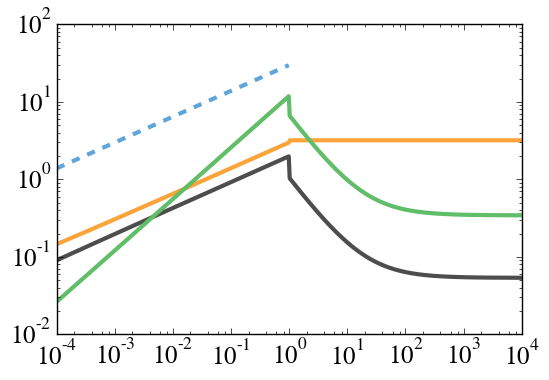

In [102]:
st_arr = np.linspace(-4,4,num=500)
zeta_w = 1e-2

p_col = np.zeros(len(st_arr))
b_set_arr = np.zeros(len(st_arr))
v_a_arr = np.zeros(len(st_arr))

alpha_p = 1e-3


for i,log_st in enumerate(st_arr):
    st = 10.**log_st
    if (st<12./zeta_w**3. and st<1.):
        st_str = 12/zeta_w**3.
        gamma = 0.65
        b_eqn = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8*st
        b_set_unexp = opt.fsolve(b_eqn,np.sqrt(12.*st/zeta_w))
        b_set_arr[i] = b_set_unexp*np.exp(-(st/st_str)**gamma)
        v_a_arr[i] = (3.*b_set_arr[i]/2. + zeta_w)
        p_col[i] = 2*b_set_arr[i]*v_a_arr[i]
    elif (st>1. and st>zeta_w):
        b_set_arr[i] = (1.7*alpha_p**(1./2.) + 1.0/st)
        v_a_arr[i] = 3.2
        p_col[i] = 2*b_set_arr[i]*v_a_arr[i]
    else:
        v_a_arr[i] = zeta_w*np.sqrt(1. + 4.*st**2.)/(1 + st**2.)
        b_set_arr[i] = alpha_p*np.sqrt(1 + 6./(alpha_p + v_a**2.))
        p_col[i] = 2*b_set_arr[i]*v_a_arr[i]
        
plt.loglog(10**st_arr,b_set_arr)
plt.loglog((10**st_arr)[np.where(st_arr<0)],((10**st_arr)**(1./3.))[np.where(st_arr<0)]*3e1,linestyle='dashed')
plt.loglog(10**st_arr,v_a_arr)
plt.loglog(10**st_arr,p_col)

In [100]:
b_set_arr[249]

1.9854638603097148

# Make Plots for Paper

In [22]:
# alphas = [1e-2]
alph = 1e-100
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0
a_au = semi_maj

r_s_arr = np.logspace(-4,4,num=250)
M_arr = np.logspace(-5,2,num=250)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

# M_arr = np.logspace(-5,1,num=1000)

p_col_mmr = np.zeros((len(M_arr),len(r_s_arr)))
p_col_OK = np.zeros((len(M_arr),len(r_s_arr)))
p_col_LJ = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
st_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_OK10 = np.zeros((len(M_arr),len(r_s_arr)))
time_LJ = np.zeros((len(M_arr),len(r_s_arr)))
zeta_w_arr = np.zeros(len(M_arr))

# work_arr = v_p_arr

# alpha = 1e-2

for i,M in enumerate(M_arr):
    for j,r_s in enumerate(r_s_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        time_arr[i,j] = time
        st_arr[i,j] = st
        if time!=0:
#             h_disk, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)
#             p_col_mmr[i,j] = 2*r_acc*v_inf
            p_col_mmr[i,j] = TvsR_sng(m_earths=M,r=r_s,out='pcol',alph=alph,a_au=semi_maj,extend_rh=1)
        else:
            p_col_mmr[i,j] = 1e100
        r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
        v_h = r_h*om
        v_gas = np.sqrt((eta*v_kep)**2.+(np.sqrt(alph)*c_s)**2.)
        zeta_w = v_gas/(r_h*om)
        zeta_w_arr[i] = zeta_w
        st_str = 12./zeta_w**3.
        st = st_rad(rad=r_s,a_au=semi_maj)
        if (st<12./zeta_w**3. and st<1.):
            b_set_func = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8.*st
            b_sol = opt.brentq(b_set_func,0,5)
#             b_sol[i] = opt.fsolve(b_set_func,zeta_w)[0]
            b_set = b_sol*r_h
#             b_set[i] = b_sol[i]*np.exp(-(st/st_str)**(0.65))*r_h
            v_a = (3.*b_set/2./r_h + zeta_w)*v_h
            p_col_OK[i,j] = 2*b_set*v_a
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years
        elif (st>1. and st>zeta_w):
            b_set = (1.0/st)*r_h
            v_a = 3.2*v_h
            p_col_OK[i,j] = 2*b_set*v_a
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years
        else:
            p_col_OK[i,j] = 1e100
        
        tau_p = (fn.G*M*fn.m_earth)/(eta*v_kep + v_h)**3.*om
        M_t = np.sqrt(1./3.)*(eta*v_kep)**3./(fn.G*om)/fn.m_earth
        if st > tau_p:
            p_col_LJ[i,j] = 1e100
        elif M<M_t:
            r_b = fn.G*M*fn.m_earth/(eta*v_kep)**2.
            t_b = r_b/(eta*v_kep)
            r_d = (t_b/4./(st/om))**(-1./2.)*r_b
            v_app = (eta*v_kep + om*r_d)
            p_col_LJ[i,j] = 2*r_d*v_app
            time_LJ[i,j] = (M*fn.m_earth)/(p_col_LJ[i,j]*sigma_p)*fn.sec_to_years
        else:
#             r_d = r_h*min(1.,(st/0.1)**(1./3.))
            r_d = r_h*(st/0.1)**(1./3.)
            v_app = (eta*v_kep + om*r_d)
            p_col_LJ[i,j] = 2*r_d*v_app
            time_LJ[i,j] = (M*fn.m_earth)/(p_col_LJ[i,j]*sigma_p)*fn.sec_to_years
    if i%10 ==0:
        print i

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


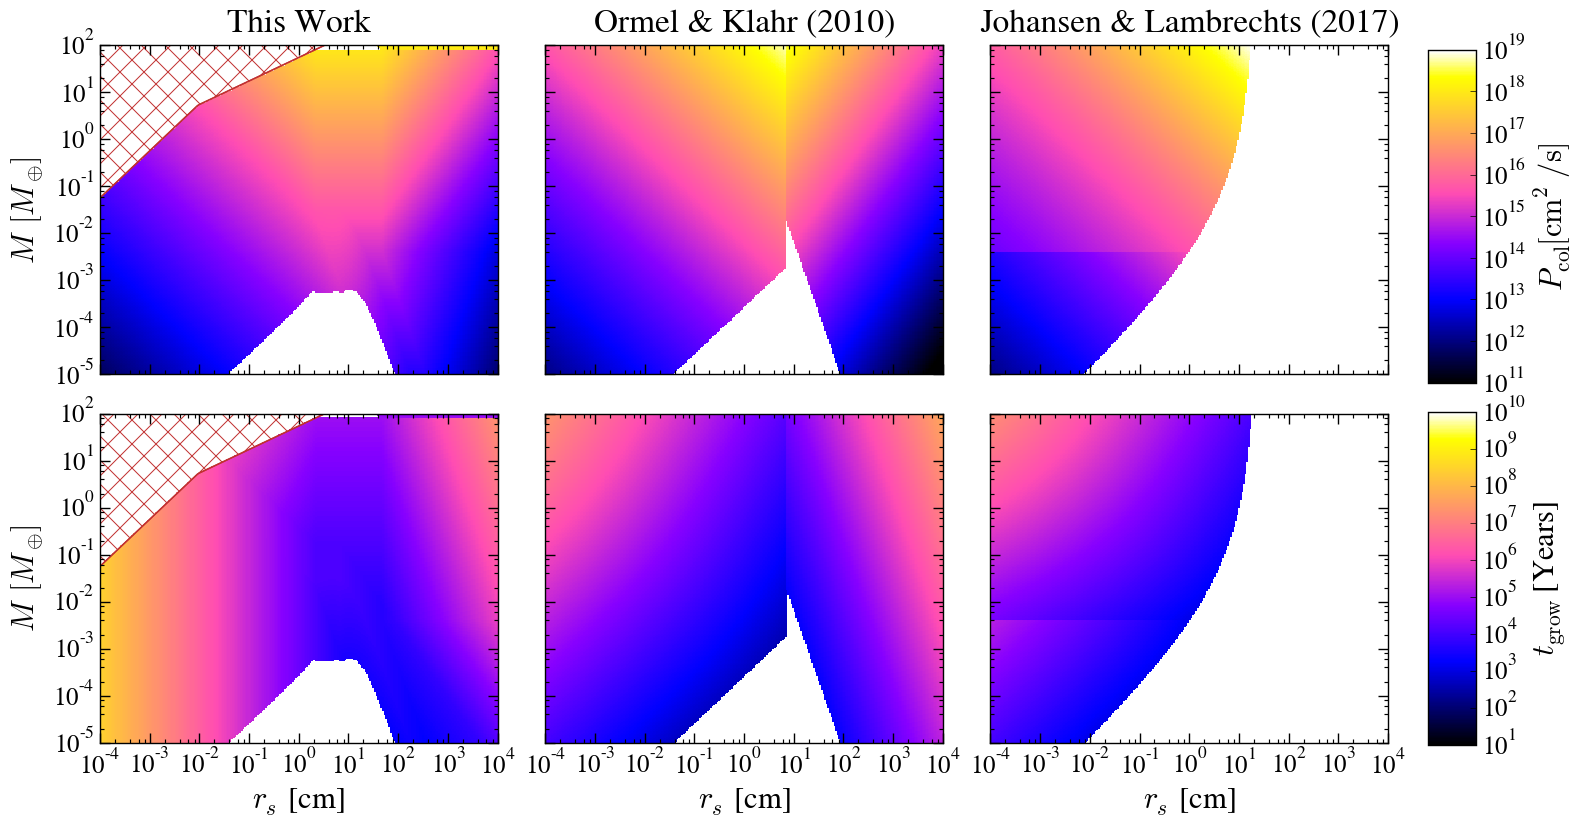

In [23]:
fig = plt.figure(1,figsize=(16,9))

p_col_vmin = 1e11
p_col_vmax = 1e19
t_grow_vmin=1e1
t_grow_vmax=1e10

cmap = 'gnuplot2'

ax = plt.subplot(2,3,1)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_mmr, cmap=cmap,norm=LogNorm(),vmin=p_col_vmin,vmax=p_col_vmax)
plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$M \, [M_\oplus]$',fontsize=22)

ax.tick_params(labelbottom='off')  
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

ax.set_title("This Work",y=1.02,fontsize=24)


rad_min = np.minimum(2.69861*(semi_maj)**(11./7.)*r_s_arr,0.541903*(semi_maj)**(19./14.)*(r_s_arr)**(1./2.))

plt.fill_between(r_s_arr,rad_min,1e5,facecolor='none',edgecolor='#C13131',hatch='/')
plt.fill_between(r_s_arr,rad_min,1e5,facecolor='none',edgecolor='#C13131',hatch='\\')

ax = plt.subplot(2,3,2)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_OK, cmap=cmap,norm=LogNorm(),vmin=p_col_vmin,vmax=p_col_vmax)
plt.xscale('log')
plt.yscale('log')

ax.tick_params(labelbottom='off')
ax.tick_params(labelleft='off')
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

ax.set_title("Ormel & Klahr (2010)",y=1.02,fontsize=24)

ax = plt.subplot(2,3,3)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_LJ, cmap=cmap,norm=LogNorm(),vmin=p_col_vmin,vmax=p_col_vmax)
plt.xscale('log')
plt.yscale('log')

ax.tick_params(labelbottom='off')
ax.tick_params(labelleft='off')
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

cax = fig.add_axes([0.90, 0.525, 0.03, 0.37])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$P_{\rm{col}} [\rm{cm}^2/\rm{s}]$',fontsize=22)

ax.set_title("Johansen & Lambrechts (2017)",y=1.02,fontsize=24)
           
ax = plt.subplot(2,3,4)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_arr, cmap=cmap,norm=LogNorm(),vmin=t_grow_vmin,vmax=t_grow_vmax)
plt.xscale('log')
plt.yscale('log')


plt.xlabel(r'$r_s$ [cm]',fontsize=22)
plt.ylabel(r'$M \, [M_\oplus]$',fontsize=22)

ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

rad_min = np.minimum(2.69861*(semi_maj)**(11./7.)*r_s_arr,0.541903*(semi_maj)**(19./14.)*(r_s_arr)**(1./2.))

plt.fill_between(r_s_arr,rad_min,1e5,facecolor='none',edgecolor='#C13131',hatch='/')
plt.fill_between(r_s_arr,rad_min,1e5,facecolor='none',edgecolor='#C13131',hatch='\\')

ax = plt.subplot(2,3,5)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_OK10, cmap=cmap,norm=LogNorm(),vmin=t_grow_vmin,vmax=t_grow_vmax)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$r_s$ [cm]',fontsize=22)

ax.tick_params(labelleft='off')
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

ax = plt.subplot(2,3,6)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_LJ, cmap=cmap,norm=LogNorm(),vmin=t_grow_vmin,vmax=t_grow_vmax)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$r_s$ [cm]',fontsize=22)

ax.tick_params(labelleft='off')
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)
           
cax = fig.add_axes([0.90, 0.123, 0.03, 0.37])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{\rm{grow}}$ [Years]',fontsize=22)

plt.subplots_adjust(left=0.070,right=0.875,hspace=0.12,wspace=0.12)

In [25]:
fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper1_submit/revised_figures/lam_comp.png',dpi=150)

In [34]:
fig.savefig('/Users/michaelrosenthal/Documents/fig_tst.png',dpi=350)

## With Smoothing

In [51]:
# alphas = [1e-2]
alph = 1e-100
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0
a_au = semi_maj

r_s_arr = np.logspace(-4,4,num=250)
M_arr = np.logspace(-5,2,num=250)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

# M_arr = np.logspace(-5,1,num=1000)

p_col_mmr = np.zeros((len(M_arr),len(r_s_arr)))
p_col_OK = np.zeros((len(M_arr),len(r_s_arr)))
p_col_LJ = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
st_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_OK10 = np.zeros((len(M_arr),len(r_s_arr)))
time_LJ = np.zeros((len(M_arr),len(r_s_arr)))
zeta_w_arr = np.zeros(len(M_arr))

# work_arr = v_p_arr

# alpha = 1e-2

for i,M in enumerate(M_arr):
    for j,r_s in enumerate(r_s_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        time_arr[i,j] = time
        st_arr[i,j] = st
        if time!=0:
#             h_disk, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)
#             p_col_mmr[i,j] = 2*r_acc*v_inf
            p_col_mmr[i,j] = TvsR_sng(m_earths=M,r=r_s,out='pcol',alph=alph,a_au=semi_maj,extend_rh=1)
        else:
            p_col_mmr[i,j] = 1e100
        r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
        v_h = r_h*om
        v_gas = np.sqrt((eta*v_kep)**2.+(np.sqrt(alph)*c_s)**2.)
        zeta_w = v_gas/(r_h*om)
        zeta_w_arr[i] = zeta_w
        st_str = 12./zeta_w**3.
        st = st_rad(rad=r_s,a_au=semi_maj)
        if (st<12./zeta_w**3. and st<1.):
            b_set_func = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8.*st
            b_sol = opt.brentq(b_set_func,0,5)
#             b_sol[i] = opt.fsolve(b_set_func,zeta_w)[0]
            b_set = b_sol*r_h
#             b_set[i] = b_sol[i]*np.exp(-(st/st_str)**(0.65))*r_h
            v_a = (3.*b_set/2./r_h + zeta_w)*v_h
            p_col_OK[i,j] = 2*b_set*v_a
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years
        elif (st>1. and st>zeta_w):
            b_set = (1.0/st)*r_h
            v_a = 3.2*v_h
            p_col_OK[i,j] = 2*b_set*v_a
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years
        else:
            p_col_OK[i,j] = 1e100        
        M_t = np.sqrt(1./3.)*(eta*v_kep)**3./(fn.G*om)/fn.m_earth
        tau_p = (fn.G*M*fn.m_earth)/(eta*v_kep + v_h)**3.*om
        if M<M_t:
            r_b = fn.G*M*fn.m_earth/(eta*v_kep)**2.
            t_b = r_b/(eta*v_kep)
            r_d = (t_b/4./(st/om))**(-1./2.)*r_b*np.exp(-0.4*(st/tau_p)**(0.65))
            
            v_app = (eta*v_kep + om*r_d)
            p_col_LJ[i,j] = 2*r_d*v_app
            time_LJ[i,j] = (M*fn.m_earth)/(p_col_LJ[i,j]*sigma_p)*fn.sec_to_years
        else:
#             r_d = r_h*min(1.,(st/0.1)**(1./3.))
            r_d = r_h*(st/0.1)**(1./3.)*np.exp(-0.4*(st/tau_p)**(0.65))
            v_app = (eta*v_kep + om*r_d)
            p_col_LJ[i,j] = 2*r_d*v_app
            time_LJ[i,j] = (M*fn.m_earth)/(p_col_LJ[i,j]*sigma_p)*fn.sec_to_years
    if i%10 ==0:
        print i

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: overflow encountered in double_scalars
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: divide by zero encountered in double_scalars


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


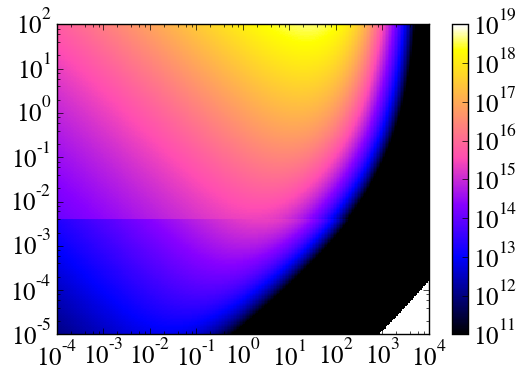

In [53]:
plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_LJ, cmap=cmap,norm=LogNorm(),vmin=p_col_vmin,vmax=p_col_vmax)
cb = plt.colorbar(im,cmap=cmap,norm=LogNorm())
plt.xscale('log')
plt.yscale('log')

# plt.loglog(r_s_arr,5.9266*semi_maj**(-5./4.)*r_s_arr**(-1./2.))

# Show Important Areas of Plot

In [3]:
# alphas = [1e-2]
alph = 1e-100
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0
a_au = semi_maj

r_s_arr = np.logspace(-4,4,num=250)
M_arr = np.logspace(-5.5,2,num=250)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

# M_arr = np.logspace(-5,1,num=1000)

p_col_mmr = np.zeros((len(M_arr),len(r_s_arr)))
p_col_OK = np.zeros((len(M_arr),len(r_s_arr)))
p_col_LJ = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
st_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_OK10 = np.zeros((len(M_arr),len(r_s_arr)))
time_LJ = np.zeros((len(M_arr),len(r_s_arr)))
zeta_w_arr = np.zeros(len(M_arr))

# work_arr = v_p_arr

# alpha = 1e-2

for i,M in enumerate(M_arr):
    for j,r_s in enumerate(r_s_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        time_arr[i,j] = time
        st_arr[i,j] = st
        if time!=0:
#             h_disk, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)
#             p_col_mmr[i,j] = 2*r_acc*v_inf
            p_col_mmr[i,j] = TvsR_sng(m_earths=M,r=r_s,out='pcol',alph=alph,a_au=semi_maj,extend_rh=1)
        else:
            p_col_mmr[i,j] = 1e100

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


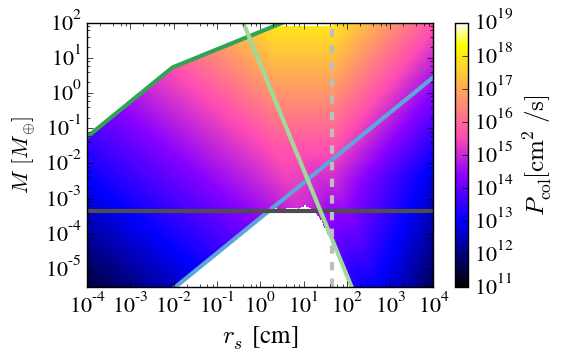

In [4]:
fig = plt.figure(1)

p_col_vmin = 1e11
p_col_vmax = 1e19

cmap = 'gnuplot2'

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_mmr, cmap=cmap,norm=LogNorm(),vmin=p_col_vmin,vmax=p_col_vmax)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap=cmap,norm=LogNorm())

plt.xlabel(r'$r_s$ [cm]',fontsize=18)
plt.ylabel(r'$M \, [M_\oplus]$',fontsize=16)

cb.set_label(label=r'$P_{\rm{col}} [\rm{cm}^2/\rm{s}]$')
cb.ax.tick_params(labelsize=16)

plt.gca().tick_params(labelsize=16)


# plt.loglog(r_s_tmp,5.49954e-6*(semi_maj)**(12./7.)*st_arr[0]) #From revision scratchwork mathematica nb
plt.loglog(r_s_arr,2.75706e-8*(semi_maj)**(19./7.)*r_s_arr,color='#'+colors[1])
m_crit = 1.29262e-6*(semi_maj)**(12./7.) #From revision scratchwork mathematica nb
plt.loglog(r_s_arr,np.full(len(r_s_arr),m_crit),color='#'+colors[0])
plt.loglog(r_s_arr,np.minimum(2.69861*(semi_maj)**(11./7.)*r_s_arr,0.541903*(semi_maj)**(19./14.)*(r_s_arr)**(1./2.)),color='#31a354')
# plt.loglog(r_s_arr,4190.23*(semi_maj)**(-9./7.)*r_s_arr**(-3.))
plt.loglog(r_s_arr,523.779*(semi_maj)**(-9./7.)*r_s_arr**(-3.),color='#a1d99b')
plt.axvline(1381.98/(semi_maj),color='#bdbdbd',linestyle='dashed',ymin=1e-4)

plt.tight_layout()

In [47]:
fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper1_submit/revised_figures/lam_detail_unedit.png',dpi=350)

## Figures for Presentation

In [4]:
# alphas = [1e-2]
alph = 1e-100
# alphas = masses
# masses = [1e0]
#
semi_maj = 5.0
a_au = semi_maj

r_s_arr = np.logspace(-4,4,num=250)
M_arr = np.logspace(-5.5,2,num=250)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

# M_arr = np.logspace(-5,1,num=1000)

p_col_mmr = np.zeros((len(M_arr),len(r_s_arr)))
p_col_OK = np.zeros((len(M_arr),len(r_s_arr)))
p_col_LJ = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
st_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_OK10 = np.zeros((len(M_arr),len(r_s_arr)))
time_LJ = np.zeros((len(M_arr),len(r_s_arr)))
zeta_w_arr = np.zeros(len(M_arr))

# work_arr = v_p_arr

# alpha = 1e-2

for i,M in enumerate(M_arr):
    for j,r_s in enumerate(r_s_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        time_arr[i,j] = time
        st_arr[i,j] = st
        if time!=0:
#             h_disk, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)
#             p_col_mmr[i,j] = 2*r_acc*v_inf
            p_col_mmr[i,j] = TvsR_sng(m_earths=M,r=r_s,out='pcol',alph=alph,a_au=semi_maj,extend_rh=1)
        else:
            p_col_mmr[i,j] = 1e100

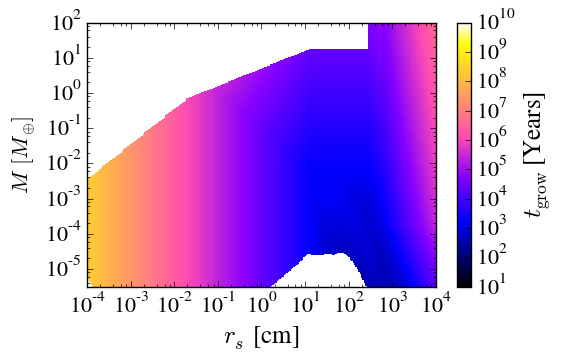

In [7]:
fig = plt.figure(1)

t_grow_vmin=1e1
t_grow_vmax=1e10

cmap = 'gnuplot2'

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_arr, cmap=cmap,norm=LogNorm(),vmin=t_grow_vmin,vmax=t_grow_vmax)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap=cmap,norm=LogNorm())

plt.xlabel(r'$r_s$ [cm]',fontsize=18)
plt.ylabel(r'$M \, [M_\oplus]$',fontsize=16)

cb.set_label(label=r'$t_{\rm{grow}}$ [Years]')
cb.ax.tick_params(labelsize=16)

plt.gca().tick_params(labelsize=16)


# # plt.loglog(r_s_tmp,5.49954e-6*(semi_maj)**(12./7.)*st_arr[0]) #From revision scratchwork mathematica nb
# plt.loglog(r_s_arr,2.75706e-8*(semi_maj)**(19./7.)*r_s_arr,color='#'+colors[1])
# m_crit = 1.29262e-6*(semi_maj)**(12./7.) #From revision scratchwork mathematica nb
# plt.loglog(r_s_arr,np.full(len(r_s_arr),m_crit),color='#'+colors[0])
# plt.loglog(r_s_arr,np.minimum(2.69861*(semi_maj)**(11./7.)*r_s_arr,0.541903*(semi_maj)**(19./14.)*(r_s_arr)**(1./2.)),color='#31a354')
# # plt.loglog(r_s_arr,4190.23*(semi_maj)**(-9./7.)*r_s_arr**(-3.))
# plt.loglog(r_s_arr,523.779*(semi_maj)**(-9./7.)*r_s_arr**(-3.),color='#a1d99b')
# plt.axvline(1381.98/(semi_maj),color='#bdbdbd',linestyle='dashed',ymin=1e-4)

plt.tight_layout()

In [8]:
fig.savefig('../../Group Meeting Notes/2018April2_PebbleAcc/flow_iso.png',dpi=350)

## Are the LJ12 Times Being Calculated Correctly?

In [7]:
# alphas = [1e-2]
alph = 1e-100
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0
a_au = semi_maj

r_s_arr = np.logspace(-4,4,num=50)
M_arr = np.logspace(-5,2,num=50)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

# M_arr = np.logspace(-5,1,num=1000)

p_col_mmr = np.zeros((len(M_arr),len(r_s_arr)))
p_col_OK = np.zeros((len(M_arr),len(r_s_arr)))
p_col_LJ = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
st_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_OK10 = np.zeros((len(M_arr),len(r_s_arr)))
time_LJ = np.zeros((len(M_arr),len(r_s_arr)))
zeta_w_arr = np.zeros(len(M_arr))

# work_arr = v_p_arr

# alpha = 1e-2

for i,M in enumerate(M_arr):
    for j,r_s in enumerate(r_s_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        time_arr[i,j] = time
        st_arr[i,j] = st
        if time!=0:
#             h_disk, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)
#             p_col_mmr[i,j] = 2*r_acc*v_inf
            p_col_mmr[i,j] = TvsR_sng(m_earths=M,r=r_s,out='pcol',alph=alph,a_au=semi_maj,extend_rh=1)
        else:
            p_col_mmr[i,j] = 1e100
        r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
        v_h = r_h*om
        v_gas = np.sqrt((eta*v_kep)**2.+(np.sqrt(alph)*c_s)**2.)
        zeta_w = v_gas/(r_h*om)
        zeta_w_arr[i] = zeta_w
        st_str = 12./zeta_w**3.
        st = st_rad(rad=r_s,a_au=semi_maj)
        if (st<12./zeta_w**3. and st<1.):
            b_set_func = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8.*st
            b_sol = opt.brentq(b_set_func,0,5)
#             b_sol[i] = opt.fsolve(b_set_func,zeta_w)[0]
            b_set = b_sol*r_h
#             b_set[i] = b_sol[i]*np.exp(-(st/st_str)**(0.65))*r_h
            v_a = (3.*b_set/2./r_h + zeta_w)*v_h
            p_col_OK[i,j] = 2*b_set*v_a
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years
        elif (st>1. and st>zeta_w):
            b_set = (1.0/st)*r_h
            v_a = 3.2*v_h
            p_col_OK[i,j] = 2*b_set*v_a
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years
        else:
            p_col_OK[i,j] = 1e100
        M_t = np.sqrt(1./3.)*(eta*v_kep)**3./(fn.G*om)/fn.m_earth
        if M<M_t:
            r_b = fn.G*M*fn.m_earth/(eta*v_kep)**2.
            t_b = r_b/(eta*v_kep)
            r_d = (t_b/(st/om))**(-1./2.)*r_b
            v_app = eta*v_kep
            p_col_LJ[i,j] = 2*r_d*v_app
            time_LJ[i,j] = (M*fn.m_earth)/(p_col_LJ[i,j]*sigma_p)*fn.sec_to_years
        else:
            r_d = r_h*min(1,st**(1./3.))
            v_app = v_h
            p_col_LJ[i,j] = 2*r_d*v_app
            time_LJ[i,j] = (M*fn.m_earth)/(p_col_LJ[i,j]*sigma_p)*fn.sec_to_years
    if i%10 ==0:
        print i

0
10
20
30
40


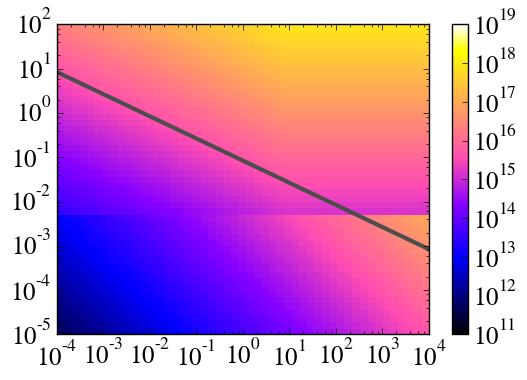

In [11]:
plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_LJ, cmap=cmap,norm=LogNorm(),vmin=p_col_vmin,vmax=p_col_vmax)
cb = plt.colorbar(im,cmap=cmap,norm=LogNorm())
plt.xscale('log')
plt.yscale('log')

plt.loglog(r_s_arr,5.9266*semi_maj**(-5./4.)*r_s_arr**(-1./2.))

# Comparison with Turbulence

## Without Smoothing

In [11]:
# alphas = [1e-2]
alph = 1e-3
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0
a_au = semi_maj

r_s_arr = np.logspace(-4,4,num=250)
M_arr = np.logspace(-5,2,num=250)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

# M_arr = np.logspace(-5,1,num=1000)

p_col_mmr = np.zeros((len(M_arr),len(r_s_arr)))
p_col_OK = np.zeros((len(M_arr),len(r_s_arr)))
p_col_LJ = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
st_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_OK10 = np.zeros((len(M_arr),len(r_s_arr)))
time_LJ = np.zeros((len(M_arr),len(r_s_arr)))
zeta_w_arr = np.zeros(len(M_arr))

# work_arr = v_p_arr

# alpha = 1e-2

for i,M in enumerate(M_arr):
    for j,r_s in enumerate(r_s_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        time_arr[i,j] = time
        st_arr[i,j] = st
        if time!=0:
#             h_disk, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)
#             p_col_mmr[i,j] = 2*r_acc*v_inf
            p_col_mmr[i,j] = TvsR_sng(m_earths=M,r=r_s,out='pcol',alph=alph,a_au=semi_maj,extend_rh=1)
        else:
            p_col_mmr[i,j] = 1e100
        r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
        v_h = r_h*om
        st = st_rad(rad=r_s,a_au=semi_maj)
        v_drift = (eta*v_kep)*(1 + 4*st**2.)**(1./2.)/(1 + st**2.)
        v_turb = np.sqrt(alph)*c_s/np.sqrt(1 + st)
        r_set = r_h*min((12.*st*v_h/v_turb)**(1./2.),(12.*st*v_h/v_drift)**(1./2.),(12*st)**(1./3.))
        v_rel = max(v_turb,v_drift,r_set*om)
        st_crit = min(12.*(v_h/v_turb)**3.,12.*(v_h/v_drift)**3.,1.)
        h_p = (c_s/om)*np.sqrt(alph/(alph+st))
        
        if st<st_crit:
            p_col_OK[i,j] = 2*r_set*v_rel
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years*max(1.,h_p/r_set)
        else:
            p_col_OK[i,j] = 1e100
        
    if i%10 ==0:
        print i

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


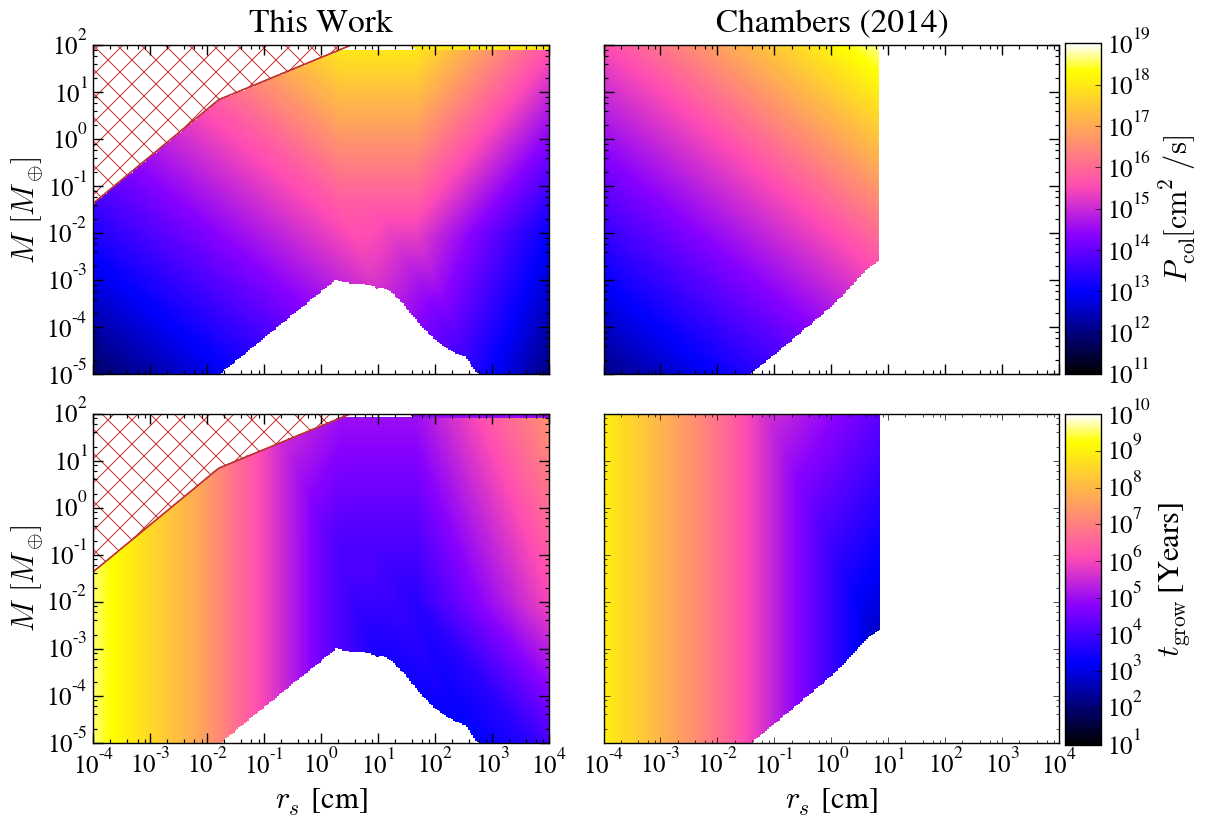

In [12]:
fig = plt.figure(1,figsize=(12,9))

p_col_vmin = 1e11
p_col_vmax = 1e19
t_grow_vmin=1e1
t_grow_vmax=1e10

cmap = 'gnuplot2'

ax = plt.subplot(2,2,1)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_mmr, cmap=cmap,norm=LogNorm(),vmin=p_col_vmin,vmax=p_col_vmax)
plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$M \, [M_\oplus]$',fontsize=22,labelpad=0.1)

ax.tick_params(labelbottom='off')  
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

ax.set_title("This Work",y=1.02,fontsize=24)

# rad_min = np.minimum(2.69861*(semi_maj)**(11./7.)*r_s_arr,0.541903*(semi_maj)**(19./14.)*(r_s_arr)**(1./2.))
rad_min_1 = 3249.85*(semi_maj)**(23./14.)*r_s_arr/(1.45026e6*(semi_maj)**(1./7.)+7.17403e9*alph*(semi_maj)**(-3./7))**(1./2.)
rad_min_2 = 0.541903*(semi_maj)**(19./14.)*(r_s_arr)**(1./2.)
rad_min = np.minimum(rad_min_1,rad_min_2)

plt.fill_between(r_s_arr,rad_min,1e5,facecolor='none',edgecolor='#C13131',hatch='/')
plt.fill_between(r_s_arr,rad_min,1e5,facecolor='none',edgecolor='#C13131',hatch='\\')

ax = plt.subplot(2,2,2)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_OK, cmap=cmap,norm=LogNorm(),vmin=p_col_vmin,vmax=p_col_vmax)
plt.xscale('log')
plt.yscale('log')

ax.tick_params(labelbottom='off')
ax.tick_params(labelleft='off')
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

ax.set_title("Chambers (2014)",y=1.02,fontsize=24)

cax = fig.add_axes([0.88, 0.535, 0.03, 0.367])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$P_{\rm{col}} [\rm{cm}^2/\rm{s}]$',fontsize=22)

ax = plt.subplot(2,2,3)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_arr, cmap=cmap,norm=LogNorm(),vmin=t_grow_vmin,vmax=t_grow_vmax)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$r_s$ [cm]',fontsize=22)
plt.ylabel(r'$M \, [M_\oplus]$',fontsize=22,labelpad=0.1)

ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)


plt.fill_between(r_s_arr,rad_min,1e5,facecolor='none',edgecolor='#C13131',hatch='/')
plt.fill_between(r_s_arr,rad_min,1e5,facecolor='none',edgecolor='#C13131',hatch='\\')
           
ax = plt.subplot(2,2,4)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_OK10, cmap=cmap,norm=LogNorm(),vmin=t_grow_vmin,vmax=t_grow_vmax)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$r_s$ [cm]',fontsize=22)

ax.tick_params(labelleft='off')
           
cax = fig.add_axes([0.88, 0.123, 0.03, 0.367])
cb = fig.colorbar(im, cax=cax,cmap=cmap,norm=LogNorm())
cb.set_label(label=r'$t_{\rm{grow}}$ [Years]',fontsize=22)

plt.subplots_adjust(left=0.070,right=0.875,hspace=0.12,wspace=0.12)


In [13]:
fig.savefig('../../Paper_Prep/Gas_Assisted_Growth/paper1_submit/revised_figures/turb_comp.png',dpi=150)

## With Smoothing

In [46]:
# alphas = [1e-2]
alph = 1e-2
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0
a_au = semi_maj

r_s_arr = np.logspace(-4,4,num=50)
M_arr = np.logspace(-5,2,num=50)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

# M_arr = np.logspace(-5,1,num=1000)

p_col_mmr = np.zeros((len(M_arr),len(r_s_arr)))
p_col_OK = np.zeros((len(M_arr),len(r_s_arr)))
p_col_LJ = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
st_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_OK10 = np.zeros((len(M_arr),len(r_s_arr)))
time_LJ = np.zeros((len(M_arr),len(r_s_arr)))
zeta_w_arr = np.zeros(len(M_arr))

# work_arr = v_p_arr

# alpha = 1e-2

for i,M in enumerate(M_arr):
    for j,r_s in enumerate(r_s_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        time_arr[i,j] = time
        st_arr[i,j] = st
        if time!=0:
            h_disk, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)
            p_col_mmr[i,j] = 2*r_acc*v_inf
        else:
            p_col_mmr[i,j] = 1e100
        r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
        v_h = r_h*om
        st = st_rad(rad=r_s,a_au=semi_maj)
        v_drift = (eta*v_kep)*(1 + 4*st**2.)**(1./2.)/(1 + st**2.)
        v_turb = np.sqrt(alph)*c_s/np.sqrt(1 + st)
        r_set = r_h*min((12.*st*v_h/v_turb)**(1./2.),(12.*st*v_h/v_drift)**(1./2.),(12*st)**(1./3.))
        v_rel = max(v_turb,v_drift,r_set*om)
        st_crit = min(12.*(v_h/v_turb)**3.,12.*(v_h/v_drift)**3.,1.)
        h_p = (c_s/om)*np.sqrt(alph/(alph+st))
        
        r_set_exp = r_set*np.exp(-(st/st_crit)**(0.65))
        p_col_OK[i,j] = 2*r_set_exp*v_rel
        time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years*max(1.,h_p/r_set)
        
    if i%10 ==0:
        print i

0
10
20
30
40


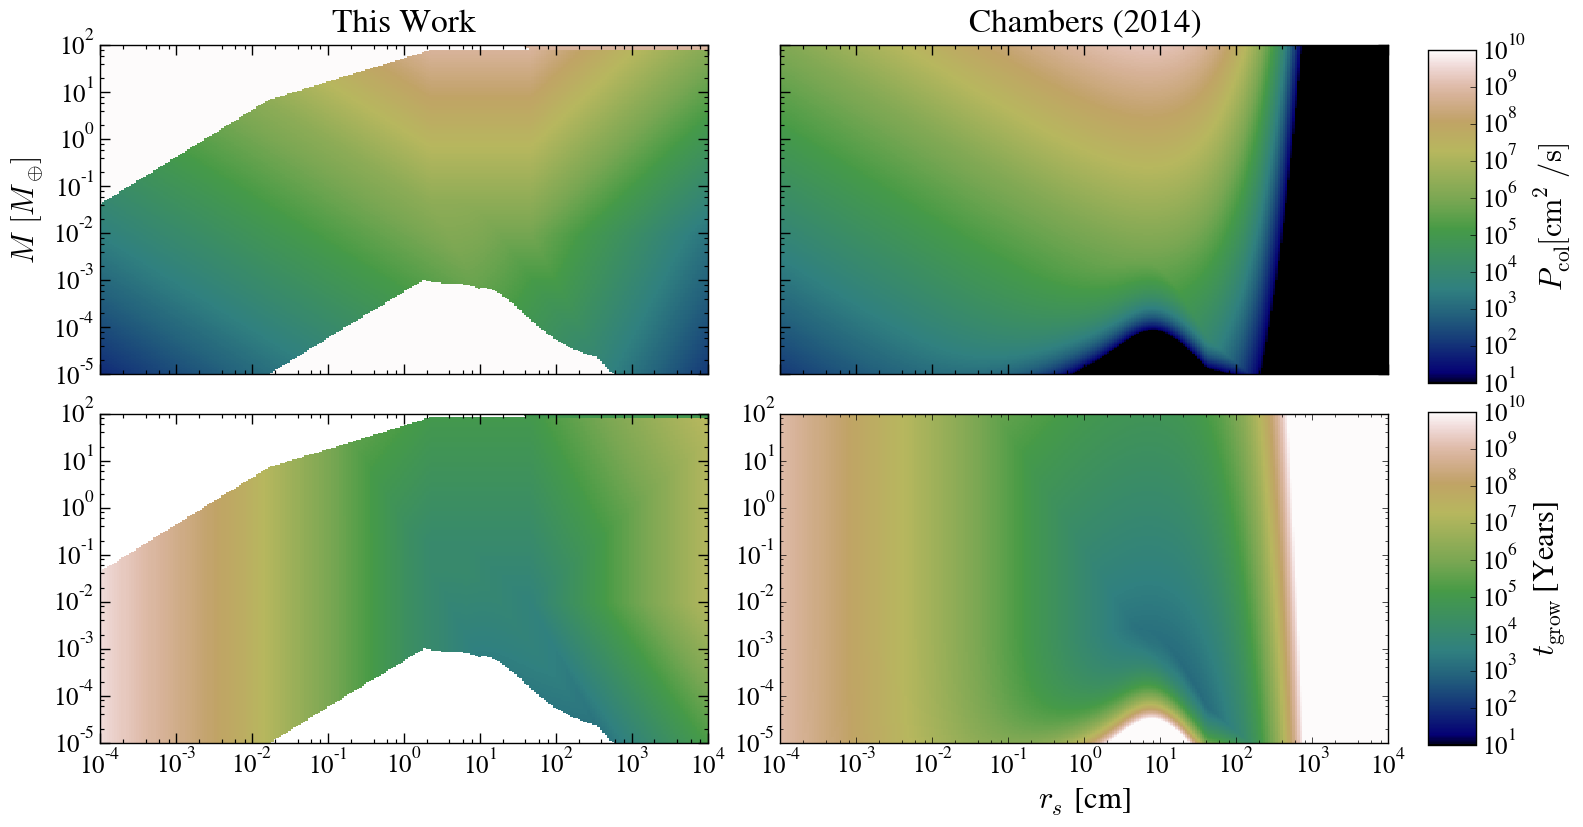

In [75]:
fig = plt.figure(1,figsize=(16,9))

p_col_vmin = 1e11
p_col_vmax = 1e19
t_grow_vmin=1e1
t_grow_vmax=1e10

ax = plt.subplot(2,2,1)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_mmr, cmap='gist_earth',norm=LogNorm(),vmin=p_col_vmin,vmax=p_col_vmax)
plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$M \, [M_\oplus]$',fontsize=22)

ax.tick_params(labelbottom='off')  
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

ax.set_title("This Work",y=1.02,fontsize=24)

ax = plt.subplot(2,2,2)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_OK, cmap='gist_earth',norm=LogNorm(),vmin=p_col_vmin,vmax=p_col_vmax)
plt.xscale('log')
plt.yscale('log')

ax.tick_params(labelbottom='off')
ax.tick_params(labelleft='off')
ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

ax.set_title("Chambers (2014)",y=1.02,fontsize=24)

ax = plt.subplot(2,2,3)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_arr, cmap='gist_earth',norm=LogNorm(),vmin=t_grow_vmin,vmax=t_grow_vmax)
plt.xscale('log')
plt.yscale('log')

ax.tick_params(which='major', length=7,width=1.0)
ax.tick_params(which='minor', length=3.0,width=0.85)

cax = fig.add_axes([0.90, 0.525, 0.03, 0.37])
cb = fig.colorbar(im, cax=cax,cmap='gist_earth',norm=LogNorm())
cb.set_label(label=r'$P_{\rm{col}} [\rm{cm}^2/\rm{s}]$',fontsize=22)
           
ax = plt.subplot(2,2,4)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_OK10, cmap='gist_earth',norm=LogNorm(),vmin=t_grow_vmin,vmax=t_grow_vmax)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$r_s$ [cm]',fontsize=22)
           
cax = fig.add_axes([0.90, 0.123, 0.03, 0.37])
cb = fig.colorbar(im, cax=cax,cmap='gist_earth',norm=LogNorm())
cb.set_label(label=r'$t_{\rm{grow}}$ [Years]',fontsize=22)

plt.subplots_adjust(left=0.070,right=0.875,hspace=0.12,wspace=0.12)

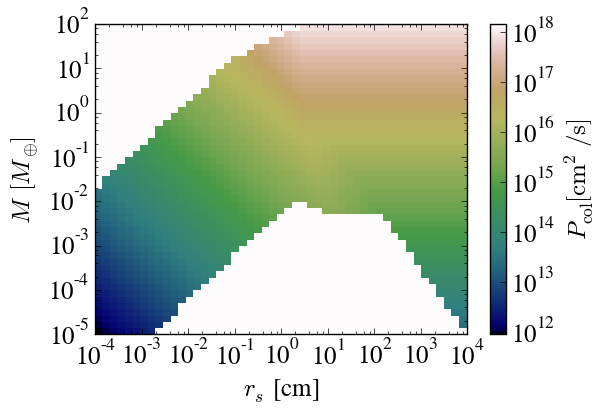

In [47]:
plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_mmr, cmap='gist_earth',norm=LogNorm(),vmax=np.amax(p_col_mmr[np.where(p_col_mmr!=1e100)]))
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

plt.xlabel(r'$r_s$ [cm]')
plt.ylabel(r'$M \, [M_\oplus]$')

cb.set_label(label=r'$P_{\rm{col}} [\rm{cm}^2/\rm{s}]$')

In [48]:
zeta_w_arr

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

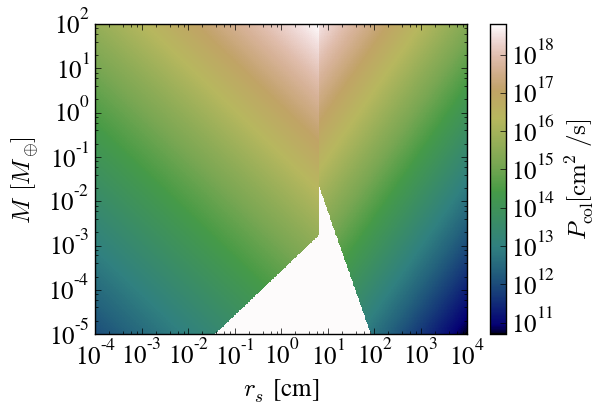

In [13]:
plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_OK, cmap='gist_earth',norm=LogNorm(),vmax=np.amax(p_col_OK[np.where(p_col_OK!=1e100)]))
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

plt.xlabel(r'$r_s$ [cm]')
plt.ylabel(r'$M \, [M_\oplus]$')

cb.set_label(label=r'$P_{\rm{col}} [\rm{cm}^2/\rm{s}]$')

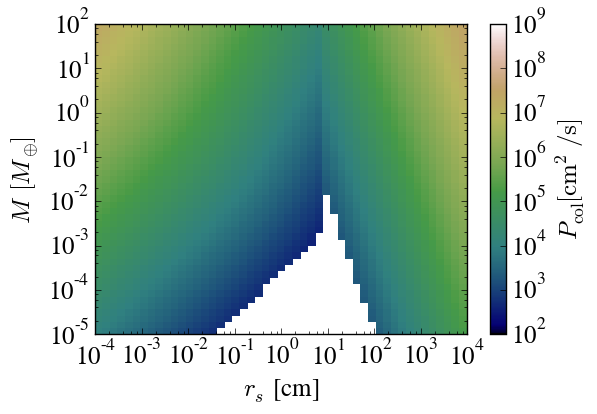

In [7]:
plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_OK10, cmap='gist_earth',norm=LogNorm(),vmin=1e2,vmax=1e9)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

plt.xlabel(r'$r_s$ [cm]')
plt.ylabel(r'$M \, [M_\oplus]$')

cb.set_label(label=r'$P_{\rm{col}} [\rm{cm}^2/\rm{s}]$')

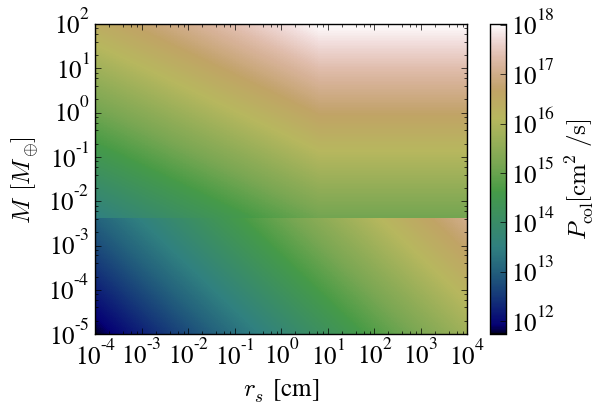

In [10]:
plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_LJ, cmap='gist_earth',norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

plt.xlabel(r'$r_s$ [cm]')
plt.ylabel(r'$M \, [M_\oplus]$')

cb.set_label(label=r'$P_{\rm{col}} [\rm{cm}^2/\rm{s}]$')

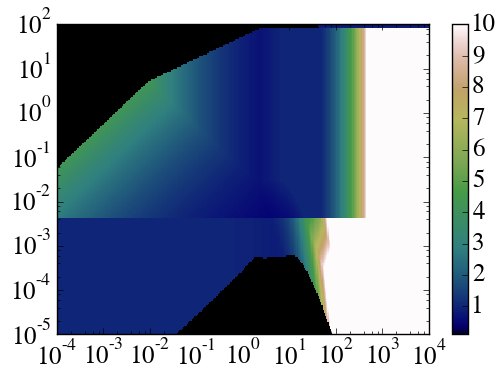

In [15]:
X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_LJ/p_col_mmr, cmap='gist_earth',vmin=1e-1,vmax=1e1)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

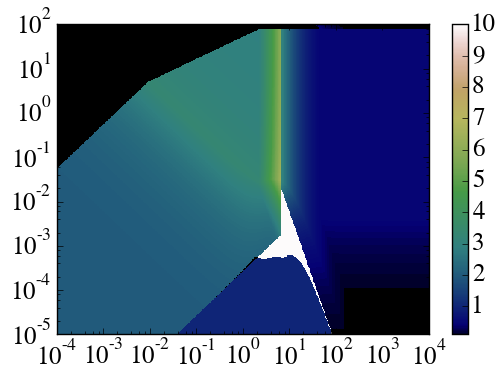

In [21]:
X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_OK/p_col_mmr, cmap='gist_earth',vmin=1e-1,vmax=1e1)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar(im,cmap='gist_earth',norm=LogNorm())

## Time plot, but account for 3D Accretion in OK10, LJ12

In [2]:
# alphas = [1e-2]
alph = 1e-100
# alphas = masses
# masses = [1e0]
#
semi_maj = 30.0
a_au = semi_maj

r_s_arr = np.logspace(-4,4,num=50)
M_arr = np.logspace(-5,2,num=50)
T = 200*a_au**(-3./7.)
sigma_p = 5.*(a_au)**(-1.)
c_s = np.sqrt(fn.k*T/fn.mu)
om = np.sqrt(fn.G*fn.m_sun/(a_au*fn.au)**3.)
v_kep = a_au*fn.au*om
eta = c_s**2./2./v_kep**2.
rho_s = 2.

# M_arr = np.logspace(-5,1,num=1000)

p_col_mmr = np.zeros((len(M_arr),len(r_s_arr)))
p_col_OK = np.zeros((len(M_arr),len(r_s_arr)))
p_col_LJ = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
st_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_arr = np.zeros((len(M_arr),len(r_s_arr)))
time_OK10 = np.zeros((len(M_arr),len(r_s_arr)))
time_LJ = np.zeros((len(M_arr),len(r_s_arr)))
zeta_w_arr = np.zeros(len(M_arr))

# work_arr = v_p_arr

# alpha = 1e-2

for i,M in enumerate(M_arr):
    for j,r_s in enumerate(r_s_arr):
        time,st = TvsR_sng(m_earths=M,r=r_s,out='st',alph=alph,a_au=semi_maj,extend_rh=1)
        time_arr[i,j] = time
        st_arr[i,j] = st
        if time!=0:
            h_disk, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=M,r=r_s,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)
            p_col_mmr[i,j] = 2*r_acc*v_inf
        else:
            p_col_mmr[i,j] = 1e100
        r_h = semi_maj*fn.au*(M*fn.m_earth/3./fn.m_sun)**(1./3.)
        v_h = r_h*om
        v_gas = np.sqrt((eta*v_kep)**2.+(np.sqrt(alph)*c_s)**2.)
        zeta_w = v_gas/(r_h*om)
        st_str = 12./zeta_w**3.
        st = st_rad(rad=r_s,a_au=semi_maj)
        if (st<12./zeta_w**3. and st<1.):
            b_set_func = lambda b: b**3. + 2.*zeta_w/3.*b**2. - 8.*st
            b_sol = opt.brentq(b_set_func,0,5)
#             b_sol[i] = opt.fsolve(b_set_func,zeta_w)[0]
            b_set = b_sol*r_h
#             b_set[i] = b_sol[i]*np.exp(-(st/st_str)**(0.65))*r_h
            v_a = (3.*b_set/2./r_h + zeta_w)*v_h
            p_col_OK[i,j] = 2*b_set*v_a
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years*max(1.,h_disk/b_set)
        elif (st>1. and st>zeta_w):
            b_set = (1.0/st)*r_h
            v_a = 3.2*v_h
            p_col_OK[i,j] = 2*b_set*v_a
            time_OK10[i,j] = (M*fn.m_earth)/(p_col_OK[i,j]*sigma_p)*fn.sec_to_years*max(1.,h_disk/b_set)
        else:
            p_col_OK[i,j] = 1e100
        M_t = np.sqrt(1./3.)*(eta*v_kep)**3./(fn.G*om)/fn.m_earth
        if M<M_t:
            r_b = fn.G*M*fn.m_earth/(eta*v_kep)**2.
            t_b = r_b/(eta*v_kep)
            r_d = (t_b/(st/om))**(-1./2.)*r_b
            v_app = eta*v_kep
            p_col_LJ[i,j] = 2*r_d*v_app
            time_LJ[i,j] = (M*fn.m_earth)/(p_col_LJ[i,j]*sigma_p)*fn.sec_to_years*max(1.,h_disk/r_d)
        else:
            r_d = r_h*min(1,st**(1./3.))
            v_app = v_h
            p_col_LJ[i,j] = 2*r_d*v_app
            time_LJ[i,j] = (M*fn.m_earth)/(p_col_LJ[i,j]*sigma_p)*fn.sec_to_years*max(1.,h_disk/r_d)
    if i%10 ==0:
        print i

0
10
20
30
40


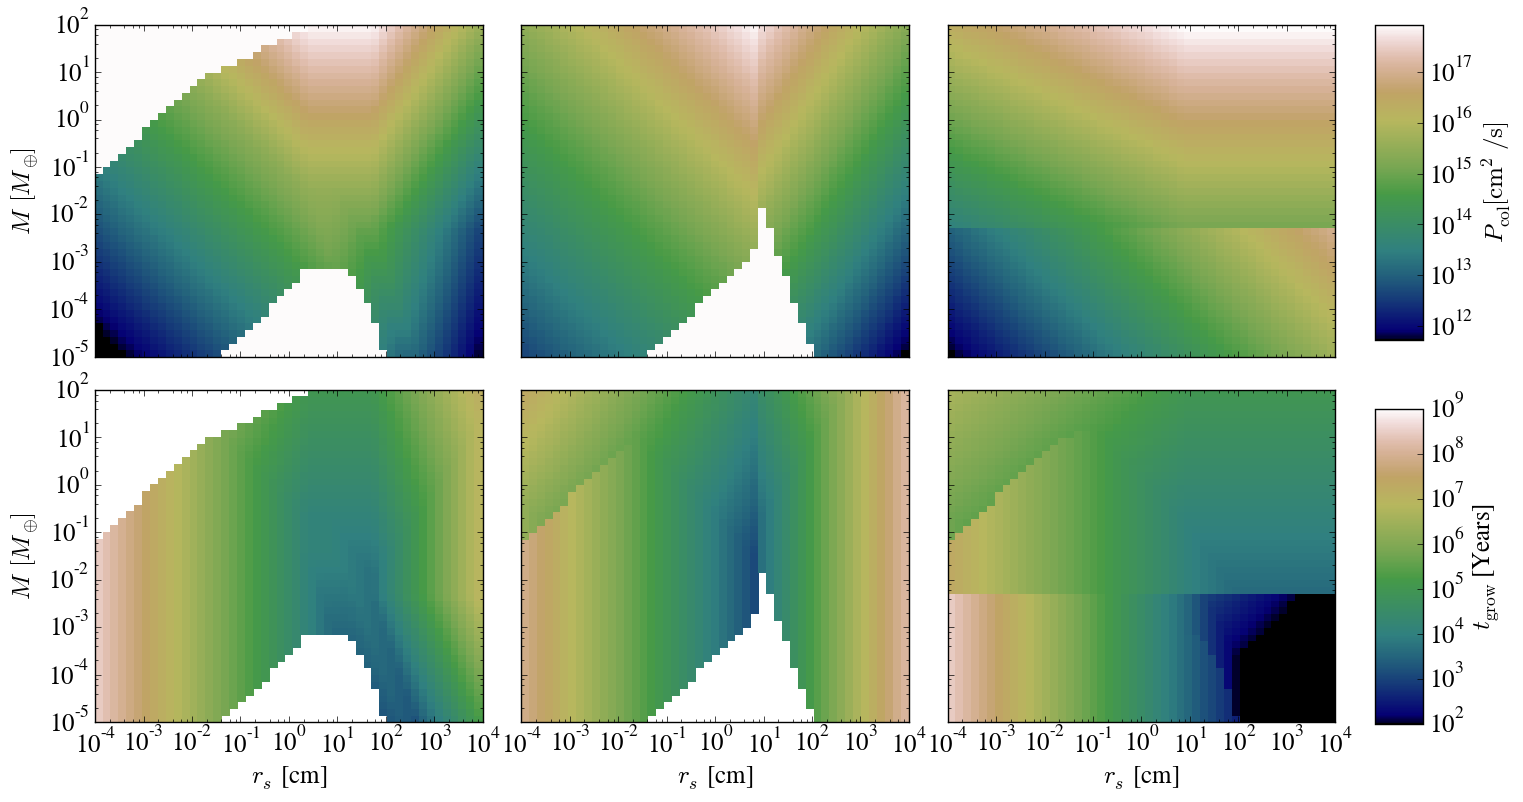

In [39]:
fig = plt.figure(1,figsize=(16,9))

ax = plt.subplot(2,3,1)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_mmr, cmap='gist_earth',norm=LogNorm(),vmin=1e12,vmax=1e18)
plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$M \, [M_\oplus]$')

ax.tick_params(labelbottom='off')  

ax = plt.subplot(2,3,2)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_OK, cmap='gist_earth',norm=LogNorm(),vmax=np.amax(p_col_OK[np.where(p_col_OK!=1e100)]))
plt.xscale('log')
plt.yscale('log')

ax.tick_params(labelbottom='off')
ax.tick_params(labelleft='off')  

ax = plt.subplot(2,3,3)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_LJ, cmap='gist_earth',norm=LogNorm())
plt.xscale('log')
plt.yscale('log')

ax.tick_params(labelbottom='off')
ax.tick_params(labelleft='off')  

cax = fig.add_axes([0.925, 0.55, 0.03, 0.35])
cb = fig.colorbar(im, cax=cax,cmap='gist_earth',norm=LogNorm())
cb.set_label(label=r'$P_{\rm{col}} [\rm{cm}^2/\rm{s}]$')
           
ax = plt.subplot(2,3,4)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_arr, cmap='gist_earth',norm=LogNorm(),vmin=1e2,vmax=1e9)
plt.xscale('log')
plt.yscale('log')


plt.xlabel(r'$r_s$ [cm]')
plt.ylabel(r'$M \, [M_\oplus]$')

ax = plt.subplot(2,3,5)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_OK10, cmap='gist_earth',norm=LogNorm(),vmin=1e2,vmax=1e9)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$r_s$ [cm]')

ax.tick_params(labelleft='off')  

ax = plt.subplot(2,3,6)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,time_LJ, cmap='gist_earth',norm=LogNorm(),vmin=1e2,vmax=1e9)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$r_s$ [cm]')

ax.tick_params(labelleft='off')  
           
cax = fig.add_axes([0.925, 0.123, 0.03, 0.35])
cb = fig.colorbar(im, cax=cax,cmap='gist_earth',norm=LogNorm())
cb.set_label(label=r'$t_{\rm{grow}}$ [Years]')

plt.subplots_adjust(hspace=0.1,wspace=0.1)

## Why are the subplots different sizes?

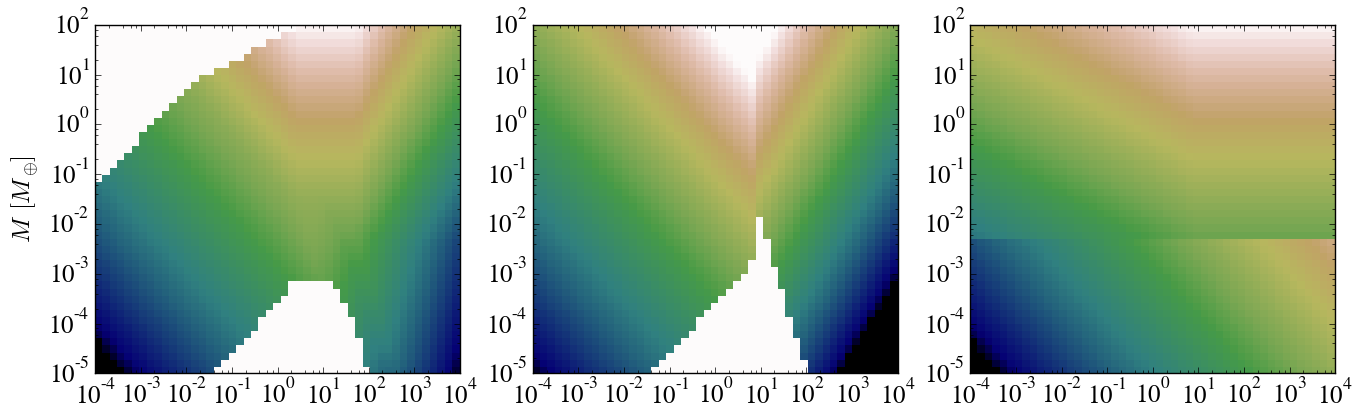

In [51]:
fig = plt.figure(1,figsize=(16,4.5))

ax = plt.subplot(1,3,1)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_mmr, cmap='gist_earth',norm=LogNorm(),vmin=1e12,vmax=1e18)
plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$M \, [M_\oplus]$')

ax = plt.subplot(1,3,2)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_OK, cmap='gist_earth',norm=LogNorm(),vmin=1e12,vmax=1e18)
plt.xscale('log')
plt.yscale('log')


ax = plt.subplot(1,3,3)

plt.axis([r_s_arr[0],r_s_arr[-1],M_arr[0],M_arr[-1]])

X, Y = np.meshgrid(r_s_arr,M_arr)
im = plt.pcolormesh(X,Y,p_col_LJ, cmap='gist_earth',norm=LogNorm(),vmin=1e12,vmax=1e18)
plt.xscale('log')
plt.yscale('log')



In [61]:
print '%.3g' %(2*eta*v_kep/om)

2.48e+12


In [63]:
h_disk, tmp, r_acc, tmp, v_inf = TvsR_sng(m_earths=1e-5,r=1e-4,out='time_param',alph=alph,a_au=semi_maj,extend_rh=1)

In [66]:
print '%.3g, %.3g' %(h_disk,r_acc)

2.48e+12, 1.81e+08


In [31]:
st_solver(st=1e-2,a_au=30.)

0.06649038006690546

In [33]:
H = c_s/om
fn.G*fn.m_earth*1e-1/(om**2.*H**3.)

0.00073019998571116922

## Check St Dependence with Semi-Major Axis

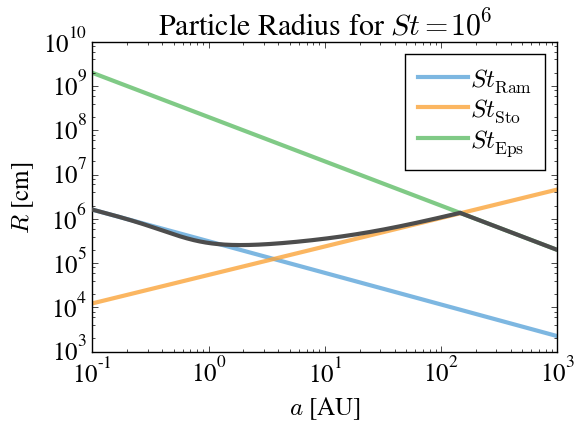

In [22]:
a_arr = np.logspace(-1,3,num=1000)
rad_arr = np.zeros(len(a_arr))
for i,a_au in enumerate(a_arr):
    rad_arr[i] = st_solver(st=1e6,a_au=a_au,alph=1e-100)
plt.loglog(a_arr,rad_arr,zorder=10)
plt.loglog(a_arr,313243.*a_arr**(-5./7.),alpha=0.8,label=r'$St_{\rm{Ram}}$')
plt.loglog(a_arr,54224.2*a_arr**(9./14.),alpha=0.8,label=r'$St_{\rm{Sto}}$')
plt.loglog(a_arr,1.99471e8*a_arr**(-1.),alpha=0.8,label=r'$St_{\rm{Eps}}$')

plt.ylabel(r'$R$ [cm]')
plt.xlabel(r'$a$ [AU]')
plt.gca().legend(loc='best')

plt.title(r'Particle Radius for $St = 10^6$')

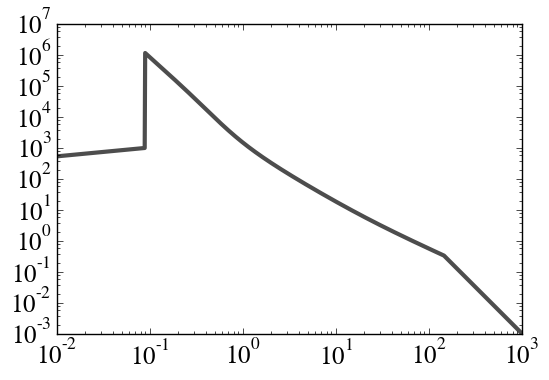

In [7]:
mfp = 6.55*a_arr**(16./7.)
eta_vk = 1204.27*a_arr**(1./14.)
vth = 135161.*a_arr**(-3./14.)
plt.loglog(a_arr,4*rad_arr*eta_vk/mfp/vth)

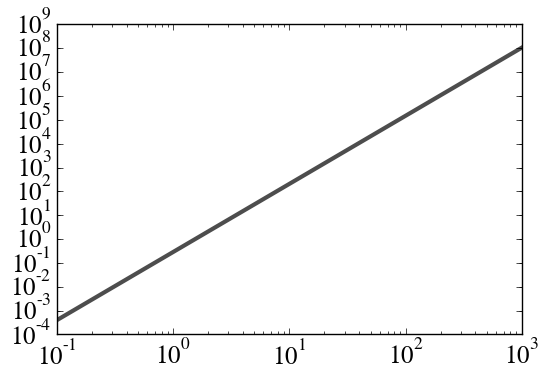

In [40]:
plt.loglog(a_arr,9*mfp/4)

In [28]:
r = st_solver(st=1e6,a_au=0.06,verbose=1)

St = 1000000
a = 0.06 AU
m_star = 1 m_sun
m_core = 1 m_earths
sig = 8333.33333333
T = 667.85081422
om = 1.35475428671e-05
cs = 153193.484275
H = 11307842741.5
rho_g = 3.68475823542e-07
mfp = 0.0106655572738
vth = 244461.431838
v_cg = 964.969074331

r_eps = 3.3245e+09
Not in Epstein
t_s = 7.381412e+10
Re_t = 6.643947e-89
t_eddy = 1.587548e-48
st_L = 6.299022e+53
v_turb = 1.531935e-45
v_gas_tot = 964.9691
v_pg_L = 964.9691
v_pg_turb = 0
v_pg_tot = 964.9691


In [38]:
a_au = 0.06
r = 313243.*a_au**(-5./7.)
m = 4./3.*np.pi*r**3.*2.
r_g = 3.68475823542e-07
v_pg = 964.9691
om = 1.35475428671e-05
f_d = 0.5*0.47*r_g*np.pi*r**2.*v_pg**2.
t_s = m*v_pg/f_d
print '%.3g' %(t_s*om)


1.01e+06


In [33]:
r = st_solver(st=1e6,a_au=1.0,verbose=1)

St = 1000000
a = 1 AU
m_star = 1 m_sun
m_core = 1 m_earths
sig = 500.0
T = 200.0
om = 1.99107403757e-07
cs = 83833.1069559
H = 4.21044649139e+11
rho_g = 5.93761256701e-10
mfp = 6.61882188446
vth = 133778.283449
v_cg = 1179.74543583

r_eps = 1.9947e+08
Not in Epstein
t_s = 5.022415e+12
Re_t = 3.986368e-90
t_eddy = 7.106034e-49
st_L = 1.407255e+54
v_turb = 8.383311e-46
v_gas_tot = 1179.745
v_pg_L = 1179.745
v_pg_turb = 0
v_pg_tot = 1179.745


In [36]:
m = 4./3.*np.pi*r**3.*2.
r_g = 5.93761256701e-10
v_pg = 1179.745
om = 1.99107403757e-07
f_d = 0.5*0.47*r_g*np.pi*r**2.*v_pg**2.
t_s = m*v_pg/f_d
print '%.3g' %(t_s*om)

9.23e+05


# Look at odd cutoff for low core mass

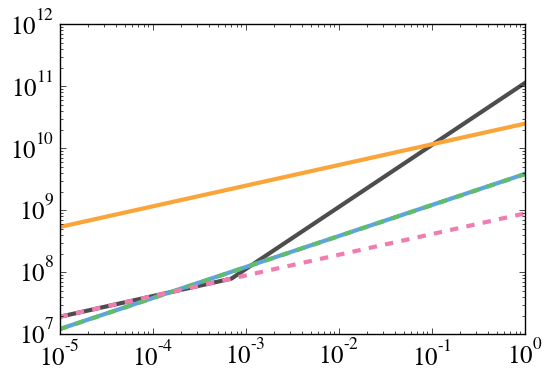

In [37]:
m_arr = np.logspace(-5,0,num=1000)
r = 5e-4
a_au = 5.
alph = 1e-1
v_gas= 26784.4*(a_au)**(-3./14.)
om = 1.99103e-7*(a_au)**(-3./2.)

r_ws_arr = np.zeros(len(m_arr))
r_b_arr = np.zeros(len(m_arr))
r_shear_arr = np.zeros(len(m_arr))
r_h_arr = np.zeros(len(m_arr))
st_arr = np.zeros(len(m_arr))

for i,M in enumerate(m_arr):
    time,r_ws_arr[i],r_h_arr[i],r_b_arr[i],r_shear_arr[i] = TvsR_sng(a_au = 5.,alph=1e-1,m_earths=M,r=r,out='len')
    time,st_arr[i] = TvsR_sng(a_au = 5.,alph=1e-1,m_earths=M,r=r,out='st')
    
plt.loglog(m_arr,r_b_arr)
plt.loglog(m_arr,r_ws_arr)
plt.loglog(m_arr,r_shear_arr)

v_h_arr = r_h_arr*om
plt.loglog(m_arr,r_h_arr*np.sqrt(3.*st_arr*v_h_arr/v_gas),linestyle='dashed')
plt.loglog(m_arr,(3*m_arr*fn.m_earth/4./np.pi/2.)**(1./3.),linestyle='dashed')

In [32]:
st_arr

array([  1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,   1.25331414e-05,   1.25331414e-05,
         1.25331414e-05,